<h1 style="font-size: 40px; color:#703342">Data Mining Project: Spies Among Us 🕵🏻</h1>

<h2>Group 5 - DM 2021/2022</h2>
<h3>Ana Rita Costa r20181058, <br>
Mariana Domingues r20181159, <br>
Renato Severiano r20181080, <br>
Rui José m20210137, <br>
Tomás Redondo r20181104
</h3>

<h2>1.Import Libraries & Data</h2>

In [1]:
!pip install pydotplus
!pip install graphviz

In [149]:
#Import statements
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import graphviz
import pydotplus
import collections
import matplotlib.pyplot as plt
import numpy as np
import time
import statistics

from scipy.stats import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression,  Ridge

from sklearn.impute import KNNImputer

from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from matplotlib import pyplot
from matplotlib.pyplot import figure

from sklearn.datasets import make_classification


import warnings
warnings.simplefilter("ignore")

In [3]:
#Import file espionage_data.csv as a DataFrame, espionage
espionage = pd.read_csv(r'data/espionage_data.csv')

#Delete additional ID Column
del espionage["ID"]
espionage

,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,No involvement,No,City,Never,7000
1,461212,Female,No,30,No,Low,6.0,0,1.0,Nothing,No involvement,No,City,Never,19610
2,466216,Male,No,29,No,Low,4.0,0,1.0,Private company,Strong involvement,Yes,Country-side,Never,8261
3,462613,Female,Yes,35,No,Average,5.0,0,1.0,Private company,No involvement,Yes,Country-side,Never,7000
4,465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,Strong involvement,No,City,Never,8261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,466246,Male,No,19,No,Low,4.0,0,1.0,Private company,Some involvement,Yes,City,Never,7000
7996,461781,Male,Yes,57,Yes,Low,2.0,1,3.0,Private company,Unknown,No,City,Never,7000
7997,465079,Male,Yes,75,Yes,Low,1.0,0,8.0,Self-employed,No involvement,No,City,Never,8261
7998,465402,Male,No,31,No,Low,NaN,0,NaN,Private company,Some involvement,No,City,Never,7000


In [4]:
#Import file espionage_data.csv as a DataFrame, espionage
espionage_test = pd.read_csv(r'data/espionage_data_test.csv')

#Delete additional ID Column
del espionage_test["ID"]
espionage_test

,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,460139,Male,No,26,No,Low,6.0,1.0,Private company,Unknown,Yes,City,Intervention in Libya,7566.0
1,460648,Female,NaN,29,No,Low,1.0,3.0,Nothing,No involvement,Yes,City,Intervention in Libya,10088.0
2,460835,Female,Yes,28,Yes,Low,1.0,3.0,Private company,Unknown,Yes,City,Intervention in Libya,0.0
3,461613,Female,No,25,Yes,Low,4.0,1.0,Private company,Some involvement,Yes,City,Intervention in Libya,10088.0
4,461721,Male,No,26,Yes,Low,5.0,1.0,Private company,Strong involvement,Yes,City,Intervention in Libya,8827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,473596,Female,No,34,No,Low,5.0,1.0,Private company,Some involvement,NaN,NaN,NaN,1261.0
489,477769,Male,Yes,62,Yes,Average,2.0,4.0,Government,No involvement,No,City,Never,0.0
490,475292,Female,Yes,47,Yes,Average,3.0,2.0,Private company,Unknown,No,City,Never,6305.0
491,472997,Female,Yes,51,Yes,Average,3.0,2.0,Nothing,No involvement,No,City,Never,11349.0


In [5]:
#Verify if ID_ORIGINAL is unique
table=espionage.pivot_table(columns=['ID_ORIGINAL'], aggfunc='size').copy()
table[table>1]

Series([], dtype: int64)

In [6]:
#Verify if ID_ORIGINAL is unique
table=espionage_test.pivot_table(columns=['ID_ORIGINAL'], aggfunc='size').copy()
table[table>1]

Series([], dtype: int64)

In [7]:
#Setting the column ID_ORIGINAL as the Index of DataFrame espionage
espionage = espionage.set_index("ID_ORIGINAL")
espionage

,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,,
467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,No involvement,No,City,Never,7000
461212,Female,No,30,No,Low,6.0,0,1.0,Nothing,No involvement,No,City,Never,19610
466216,Male,No,29,No,Low,4.0,0,1.0,Private company,Strong involvement,Yes,Country-side,Never,8261
462613,Female,Yes,35,No,Average,5.0,0,1.0,Private company,No involvement,Yes,Country-side,Never,7000
465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,Strong involvement,No,City,Never,8261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466246,Male,No,19,No,Low,4.0,0,1.0,Private company,Some involvement,Yes,City,Never,7000
461781,Male,Yes,57,Yes,Low,2.0,1,3.0,Private company,Unknown,No,City,Never,7000
465079,Male,Yes,75,Yes,Low,1.0,0,8.0,Self-employed,No involvement,No,City,Never,8261


In [8]:
#Setting the column ID_ORIGINAL as the Index of DataFrame espionage_test
espionage_test = espionage_test.set_index("ID_ORIGINAL")
espionage_test

,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,
460139,Male,No,26,No,Low,6.0,1.0,Private company,Unknown,Yes,City,Intervention in Libya,7566.0
460648,Female,NaN,29,No,Low,1.0,3.0,Nothing,No involvement,Yes,City,Intervention in Libya,10088.0
460835,Female,Yes,28,Yes,Low,1.0,3.0,Private company,Unknown,Yes,City,Intervention in Libya,0.0
461613,Female,No,25,Yes,Low,4.0,1.0,Private company,Some involvement,Yes,City,Intervention in Libya,10088.0
461721,Male,No,26,Yes,Low,5.0,1.0,Private company,Strong involvement,Yes,City,Intervention in Libya,8827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473596,Female,No,34,No,Low,5.0,1.0,Private company,Some involvement,NaN,NaN,NaN,1261.0
477769,Male,Yes,62,Yes,Average,2.0,4.0,Government,No involvement,No,City,Never,0.0
475292,Female,Yes,47,Yes,Average,3.0,2.0,Private company,Unknown,No,City,Never,6305.0


<h3>Create Variables & Functions to use throughout the project</h3>

In [9]:
categorical = {"Gender":['Female', 'Male'],
               "Foreign_Citizenship":['No', 'Yes'],
               "Frequent_Traveler":['No', 'Yes'],
               "Cellphone_Usage":['Low','Average','High'],
               "Occupation":['Private company', 'Public company','Government','Self-employed','Student','Nothing'],
               "Political_Participation":['No involvement', 'Unknown','Some involvement','Strong involvement'],
               "Social_Person":['No','Yes'],
               "Area_Residence":['City', 'Country-side'],
               "Military_Service":['Intervention in Iraq', 'Intervention in Syria','Intervention in Libya','Never']}

defDomNumerical = {"Satisfaction_Level":range(1,11)}

numerical = ["Age","Household_Size","Satisfaction_Level","Household_Income"]

cat_names = ["Gender",
               "Foreign_Citizenship",
               "Frequent_Traveler",
               "Cellphone_Usage",
               "Occupation",
               "Political_Participation",
               "Social_Person",
               "Area_Residence",
               "Military_Service"]


In [10]:
#Function coherenceCheck(varGroup,varType)

    #Receives as Parameters:
        # varGroup: this will be a dictionnaire
        # varType: control variable used to distinguish between categorical and numerical variables
    
    #Purpose: this function iterates through a given input, varGroup, looking for incoherences and solves them
                
        #The varGroup consists of a Dictionary (key-value pairs)
            
        #The function looks for incoherences in the Dataframe df considering:
            #the keys as columns
            #the values as the attributes' domain
                
        #In the Values out of the Domain Test, if an incoherence is found it gives a notice. 
        #If the varType holds the value numerical, it proceeds to fix values of bounds (below or above the domain)
                
    #Results:
        #Prints of the steps and corresponding results:
            #This function includes Python’s print() function
            #The COHERENCE TEST is successful if every Incoherence warning terminates with a * No more Incoherences * statement
        
def coherenceCheck(varGroup,varType):
    print("* Values Out of the Domain Test *\n")

        #for loop iterates through all key-value pairs in the Dictionaries
    for key,value in varGroup.items():

            if ~df[key].dropna().isin(value).all():
                print("** INCOHERENCE FOUND - Column "+key+" **\n")

                if varType=="numerical":
                    print("*** Variable of Numerical Nature - Proceeds to Fix Values Out of Bounds ***\n")

                    if (df[key] > max(value)).any():
                        print(">Value Above the Maximum!!!\n")
                        print("Proceeds to overwrite it with "+str(max(value))+".\n")
                        df[key].values[df[key] > max(value)] = max(value)


                    if (df[key] < min(value)).any():
                        print(">Value Below the Minimum!!!\n")
                        print("Proceeds to overwrite it with "+str(min(value))+".\n")
                        df[key].values[df[key] < min(value)] = min(value)

                    if df[key].isin(value).all():
                        print("* No more Incoherences *\n")
                    else:
                        print("* Incoherences Remaining *\n")

                    print()
            else:
                print('* No Incoherence Found on '+str(key)+'!*')
                

        
#Function configureBoxplot(type)
    #Receives as paramteter the type of the boxplot graph
    #Adds Q2 and value in text to the graph
    #As the name implies, it configures the graph's features
    
def configureBoxplot(type):
        
    plt.rcParams.update({'font.size': 12})
    plt.xlabel('Numerical Variables', fontsize=13)
    plt.ylabel('Scale', fontsize=13)
    
    

#Function addMedianBoxplot(dataframe,type)
    #Receives as parameters the dataframe and type of boxplot
    #Configures the Q2 (Quartil 2) text position and prints the corresponding value

def addMedianBoxplot(dataframe,type):

    medians = dataframe.median()

    #Control variable h which holds initial horizontal distance
    #Control variable v which holds initial vertical distance
    
    v=0
    h=3

    if type == "boxplot_single":
        h=40
        a=0
        
    for x in dataframe.columns:
        plt.text(h,v,"Q2="+str(int(medians[x])))
        v=v+1


def missingValuesIdent(thisDataframe, name):
    
    missing_abs=thisDataframe.isna().sum()
    missing_perc=thisDataframe.isna().sum()/len(thisDataframe)*100

    missing_abs=missing_abs[missing_abs>1]
    missing_perc=missing_perc[missing_perc>0]

    missing_abs=pd.Series(missing_abs, name="Missing Values")
    missing_perc=pd.Series(missing_perc, name="Missing Values(%)")

    missing = pd.concat([missing_abs, missing_perc], axis=1)
    

    print("****************************** Missing Values on ",name," ******************************")
    print(missing)

<h2>2.DATA ACCESS, EXPLORATION & UNDERSTANDING</h2>
<div>After collecting the data, this phase is meant to describe and explore it, as well as to verify its quality</div>
<br>
<div>It consists of:</div><br>
    <div>1)Exploratory Data Analysis (EDAs):</div>
    <div>   Univariate: Measures and Distributions in Numerical Variables' case, and Frequency regarding Categorical Variables</div>
    <div>   Multivariate (especially Bivariate): To display relationships between variables, such as correlations</div>
  <br>  <div>2)Data Quality Verification: This step evaluates data consistency and detects missing values (along the process)</div>
    
<div>It resorts to Visualizations through several graphs</div>


<h2>Exploratory Data Analysis</h2>

<h3>Univariate Analysis</h3>


In [11]:
#Get Data info of all columns in Dataframe espionage
espionage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 467329 to 467106
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   8000 non-null   object 
 1   Foreign_Citizenship      7862 non-null   object 
 2   Age                      8000 non-null   int64  
 3   Frequent_Traveler        7923 non-null   object 
 4   Cellphone_Usage          8000 non-null   object 
 5   Household_Size           7670 non-null   float64
 6   Spy                      8000 non-null   int64  
 7   Satisfaction_Level       7670 non-null   float64
 8   Occupation               7876 non-null   object 
 9   Political_Participation  7876 non-null   object 
 10  Social_Person            7924 non-null   object 
 11  Area_Residence           7924 non-null   object 
 12  Military_Service         7924 non-null   object 
 13  Household_Income         8000 non-null   int64  
dtypes: float64(2), in

In [12]:
#Generate descriptive statistics
espionage.describe()

,Age,Household_Size,Spy,Satisfaction_Level,Household_Income
count,8000.000000,7670.000000,8000.000000,7670.000000,8000.000000
mean,43.576625,2.844329,0.477625,2.641851,9985.575125
std,16.704319,1.527431,0.499530,1.711686,4190.830154
min,18.000000,1.000000,0.000000,1.000000,7000.000000
25%,31.000000,2.000000,0.000000,1.000000,7000.000000
50%,41.000000,3.000000,0.000000,2.000000,8261.000000
75%,53.000000,4.000000,1.000000,4.000000,12044.000000
max,89.000000,9.000000,1.000000,9.000000,24654.000000


In [13]:
espionage[cat_names].describe()

,Gender,Foreign_Citizenship,Frequent_Traveler,Cellphone_Usage,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service
count,8000,7862,7923,8000,7876,7876,7924,7924,7924
unique,2,2,2,3,6,4,2,2,4
top,Male,Yes,Yes,Low,Private company,No involvement,No,City,Never
freq,4392,4632,4938,4815,5444,3125,5211,6838,7537


* Measurement of Shape *

** Age **

>Excess Kurtosis: -0.151
>Platykurtic Distrbituion

>Skewness: 0.69
>Moderately Skewed Distribution



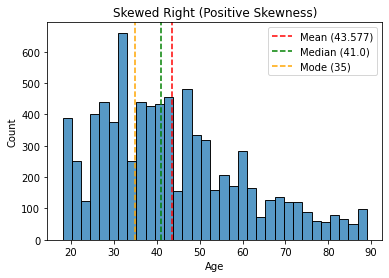


** Household_Size **

>Excess Kurtosis: 1.264
>Leptokurtic Distrbituion

>Skewness: 1.011
>Highly Skewed Distribution



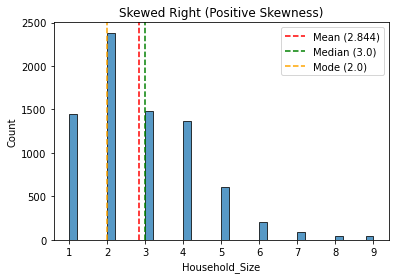


** Satisfaction_Level **

>Excess Kurtosis: 2.079
>Leptokurtic Distrbituion

>Skewness: 1.428
>Highly Skewed Distribution



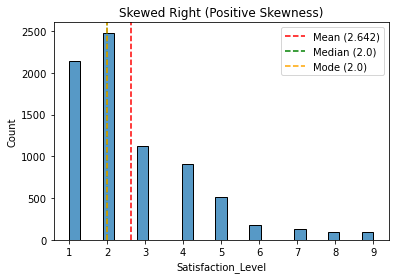


** Household_Income **

>Excess Kurtosis: 0.969
>Leptokurtic Distrbituion

>Skewness: 1.457
>Moderately Skewed Distribution



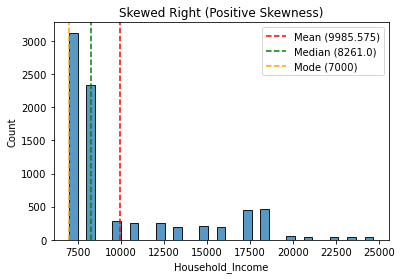

In [14]:
#Measures Shape:
print("* Measurement of Shape *\n")
    
for k in numerical:
    print("** "+k+" **\n")
    
    excKurtosis=round(kurtosis(espionage[k].dropna()),3)
    
    #Calculate Excess Kurtosis: values above 0 high risk of extreme outliers
    print(">Excess Kurtosis: "+ str(excKurtosis))
    if kurtosis(espionage[k].dropna()) <0:
        print(">Platykurtic Distrbituion\n")
    elif kurtosis(espionage[k].dropna()) ==0:
        print(">Normal Distrbituion\n")   
    else:
        print(">Leptokurtic Distrbituion\n")   

        
    #Calculate Skewness
    print(">Skewness: "+str(round(skew(espionage[k].dropna()),3)))
    if (excKurtosis <-1) | (excKurtosis >1):
        print(">Highly Skewed Distribution\n") 
    elif (excKurtosis <=-0.5) & (excKurtosis >=0.5):
        print(">Approximately Symmetric Distribution\n") 
    else:
        print(">Moderately Skewed Distribution\n") 
    
    histogram=sns.histplot(data=espionage, x=k)
    
    title="Approximately Not Skewed"
    
    if skew(espionage[k].dropna())<-0.01:
        title="Skewed Left (Negative Skewness)"
    if skew(espionage[k].dropna())>0.01:
        title="Skewed Right (Positive Skewness)"
       
    plt.title(title)
    
    plt.axvline(x=espionage[k].mean(),color='red',ls='--', lw=1.5, label='Mean ('+str(format(espionage[k].mean(),".3f"))+')')
    plt.axvline(x=espionage[k].median(),color='green',ls='--', lw=1.5, label='Median ('+str(espionage[k].median())+')')
    plt.axvline(x=espionage[k].mode().values[0],color='orange',ls='--', lw=1.5, label='Mode ('+str(espionage[k].mode().values[0])+')')

    plt.legend()

    plt.show()

    print()


In [15]:
for k, v in categorical.items():
    print(espionage[k].value_counts())
    print()

Male      4392
Female    3608
Name: Gender, dtype: int64

Yes    4632
No     3230
Name: Foreign_Citizenship, dtype: int64

Yes    4938
No     2985
Name: Frequent_Traveler, dtype: int64

Low        4815
Average    1971
High       1214
Name: Cellphone_Usage, dtype: int64

Private company    5444
Government          680
Self-employed       623
Public company      598
Student             288
Nothing             243
Name: Occupation, dtype: int64

No involvement        3125
Unknown               2505
Some involvement      1304
Strong involvement     942
Name: Political_Participation, dtype: int64

No     5211
Yes    2713
Name: Social_Person, dtype: int64

City            6838
Country-side    1086
Name: Area_Residence, dtype: int64

Never                    7537
Intervention in Iraq      201
Intervention in Syria     131
Intervention in Libya      55
Name: Military_Service, dtype: int64



<h3>Multivariate Analysis</h3>

Text(0.5, 1.08, 'Pairplot of Numerical Variables per Gender')

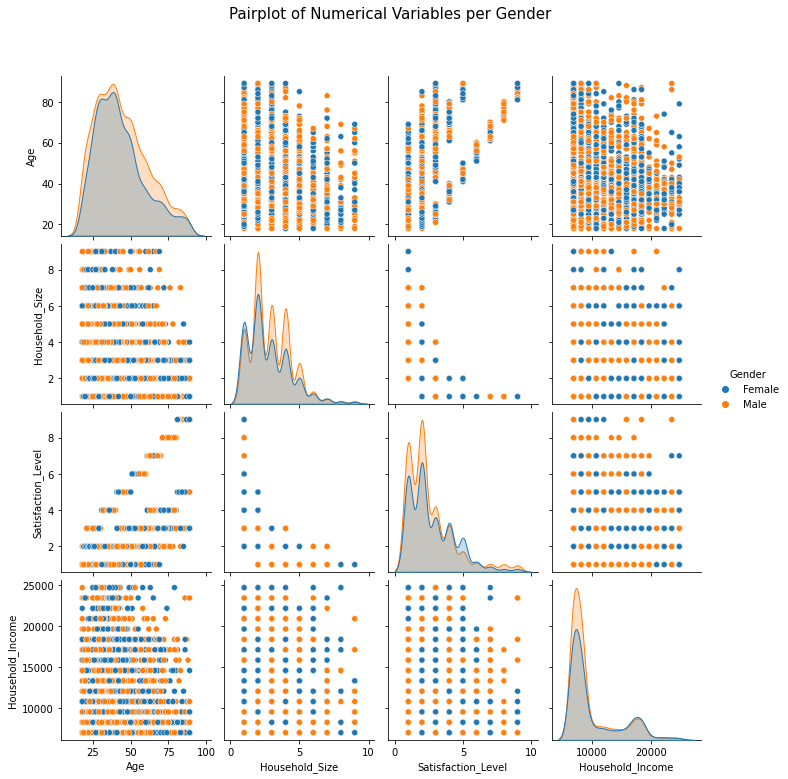

In [16]:
#ScatterPlot Numerical Attributes
pairPlot=sns.pairplot(espionage[["Age","Household_Size","Satisfaction_Level","Household_Income",'Gender']], hue='Gender',diag_kind="kde")
pairPlot.fig.suptitle("Pairplot of Numerical Variables per Gender",fontsize=15, y=1.08)

<AxesSubplot:>

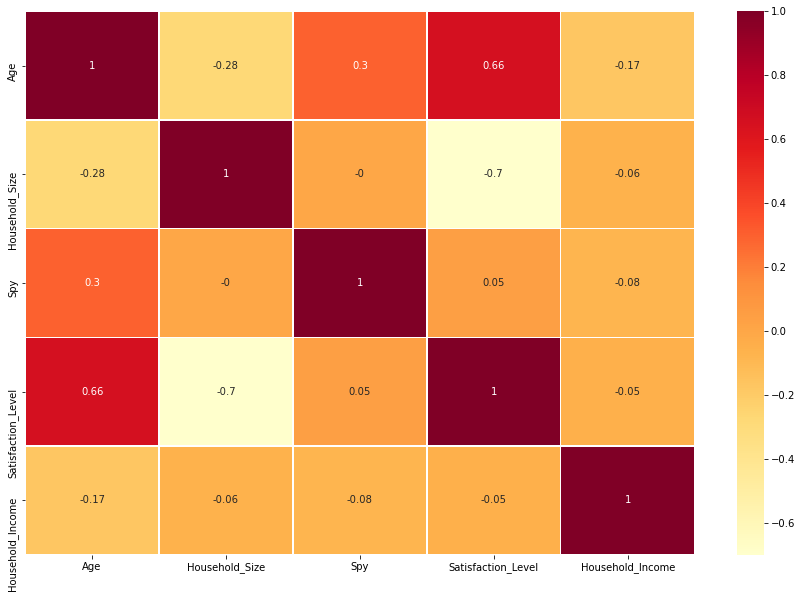

In [17]:
#Heatmap of pairwise correlation of all columns
plt.figure(figsize = (15,10))
sns.heatmap(espionage.corr().round(2), annot=True, linewidths=0.4, cmap="YlOrRd")

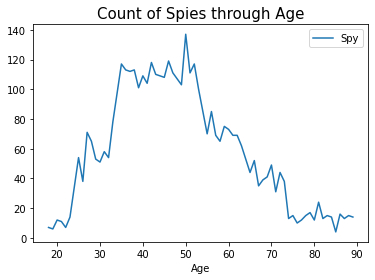

In [18]:
espionage.groupby(['Age'])['Spy'].sum().plot(legend=True).set_title("Count of Spies through Age",fontsize=15)
plt.show()

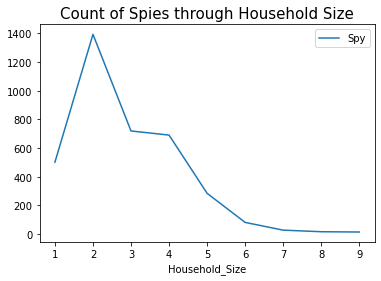

In [19]:
espionage.groupby(['Household_Size'])['Spy'].sum().plot(legend=True).set_title("Count of Spies through Household Size",fontsize=15)
plt.show()

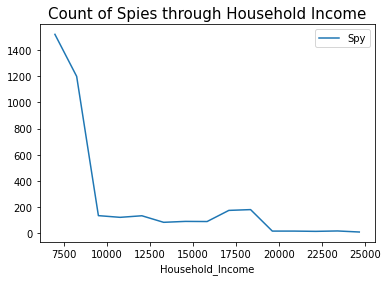

In [20]:
espionage.groupby(['Household_Income'])['Spy'].sum().plot(legend=True).set_title("Count of Spies through Household Income",fontsize=15)
plt.show()

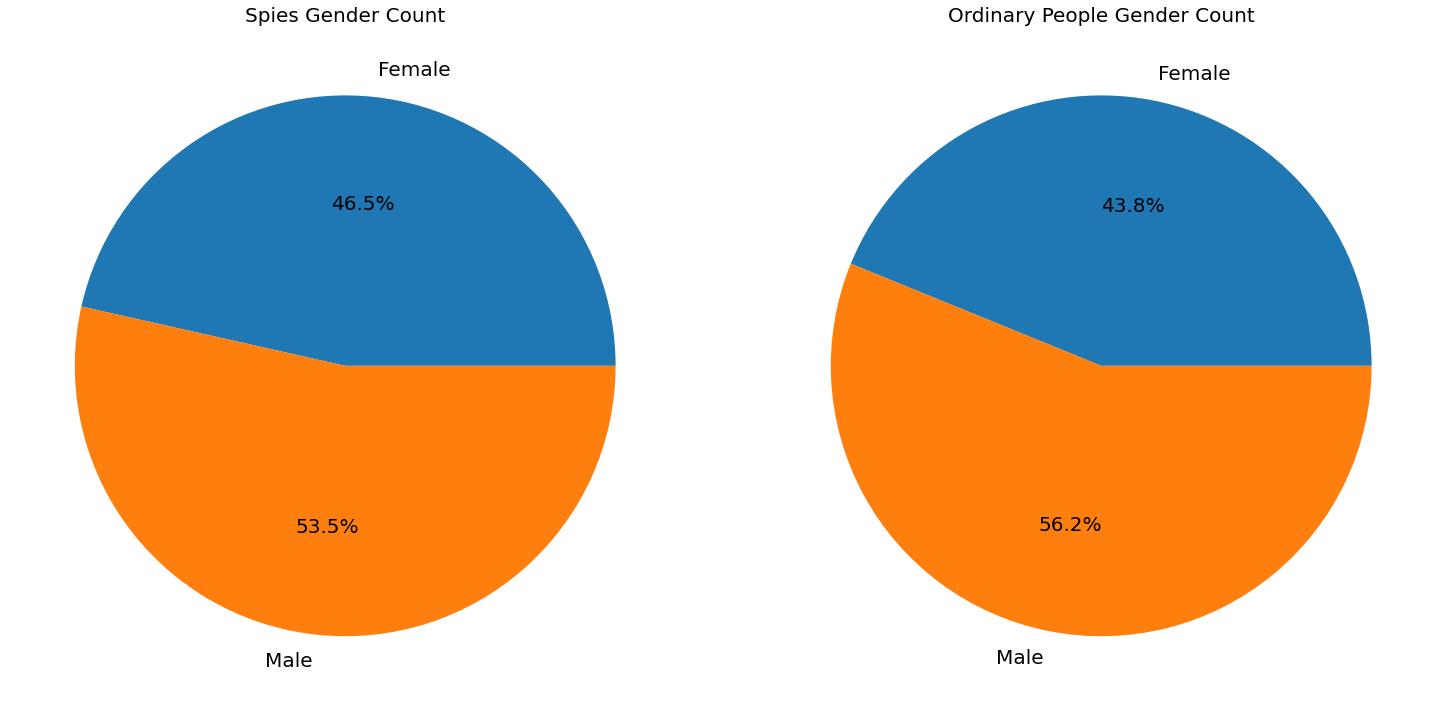

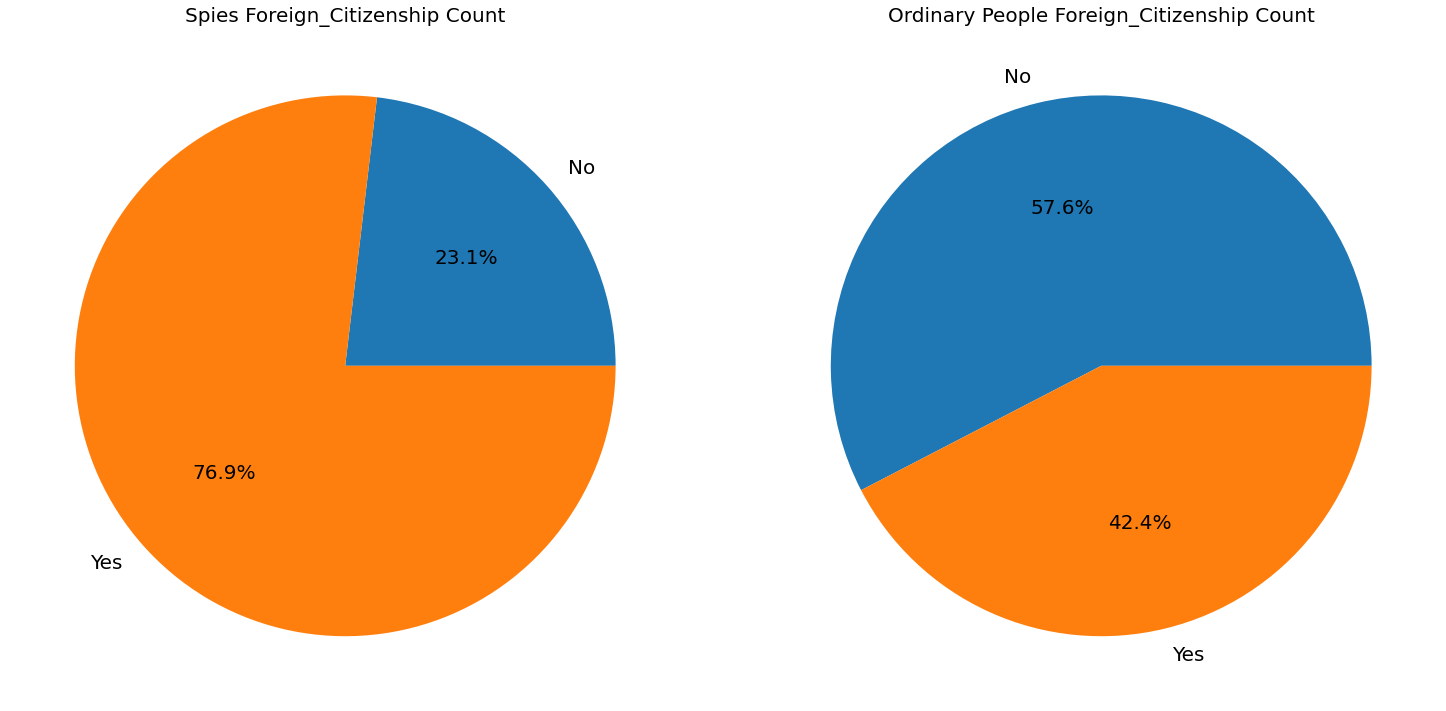

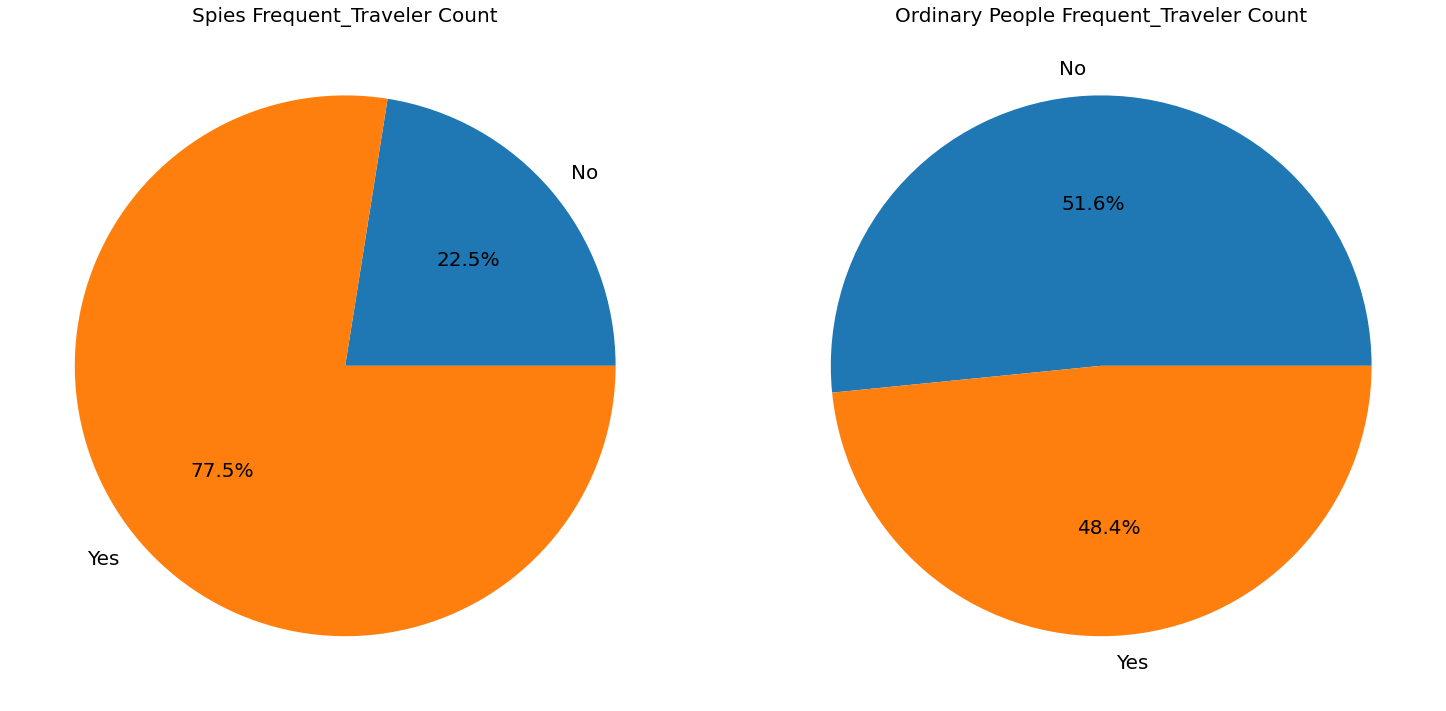

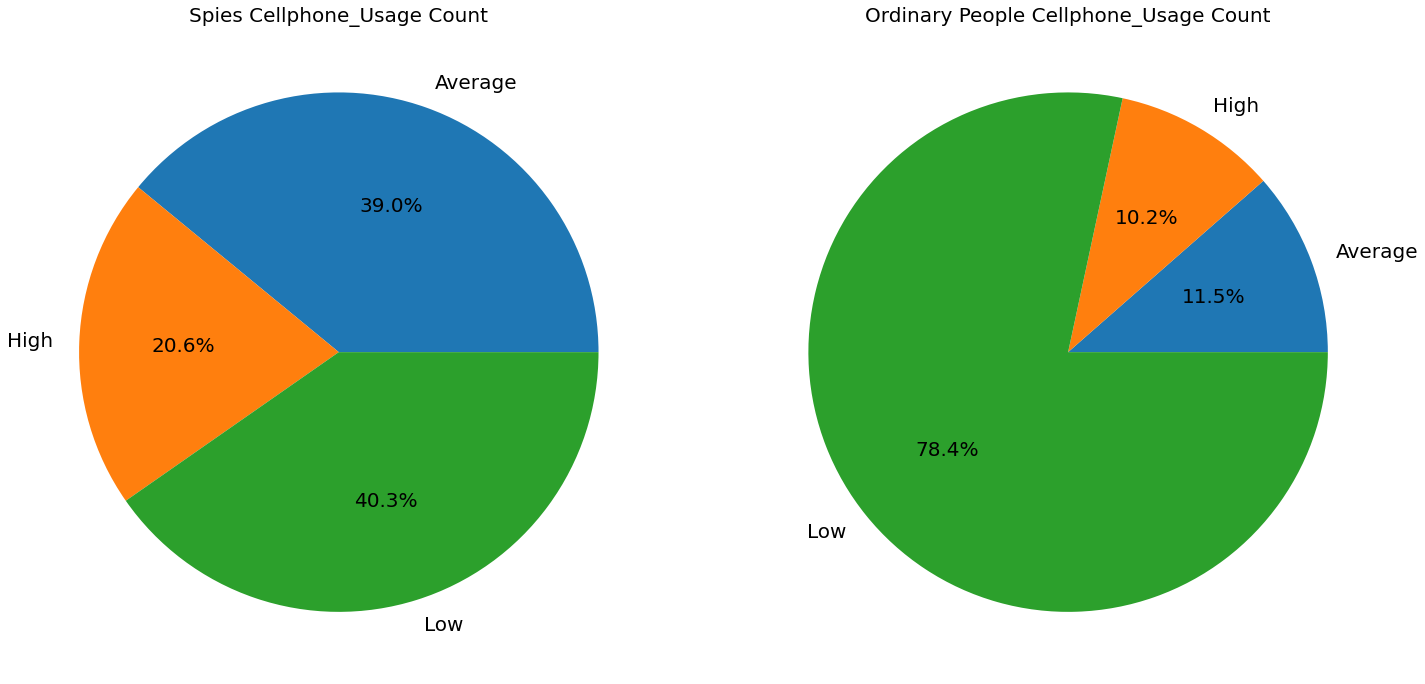

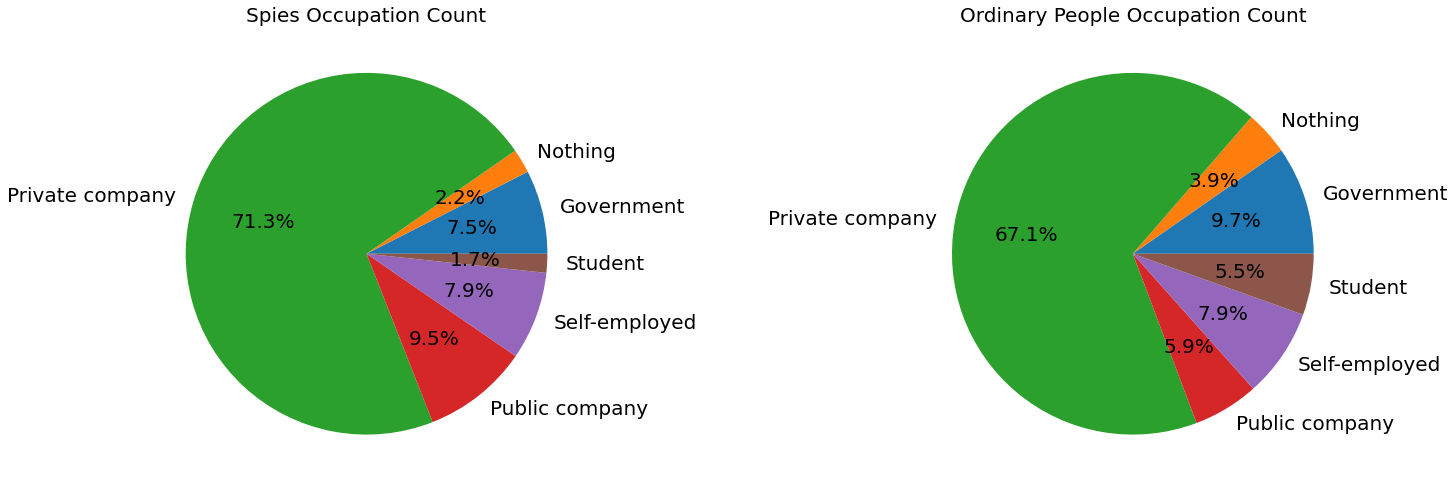

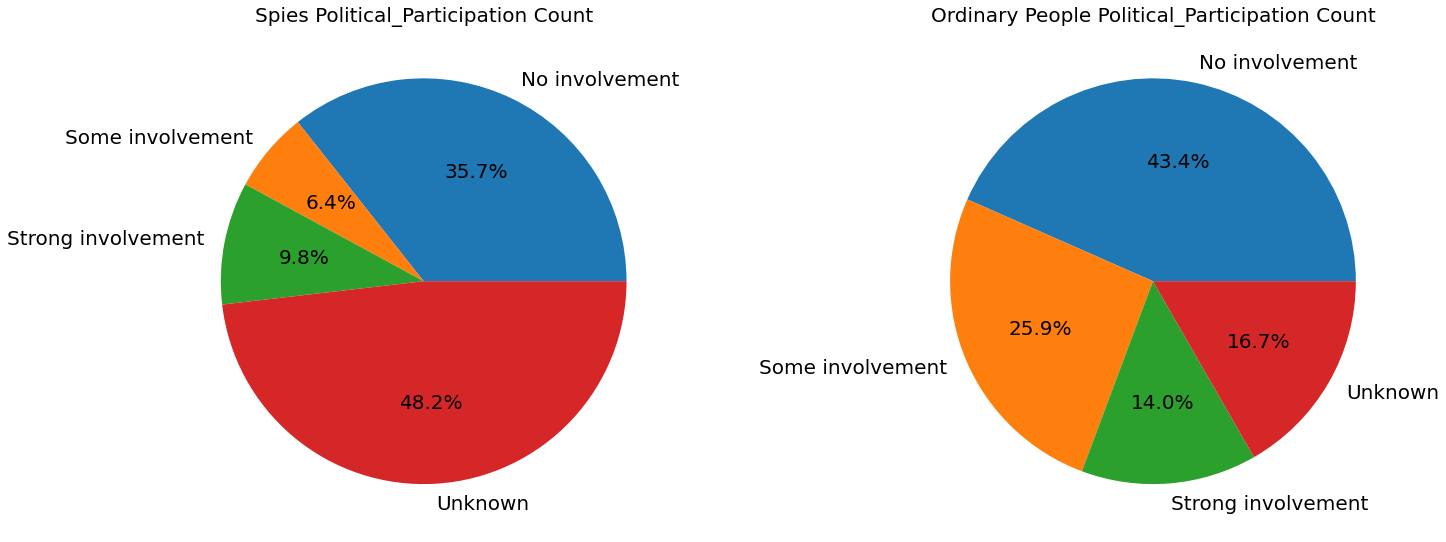

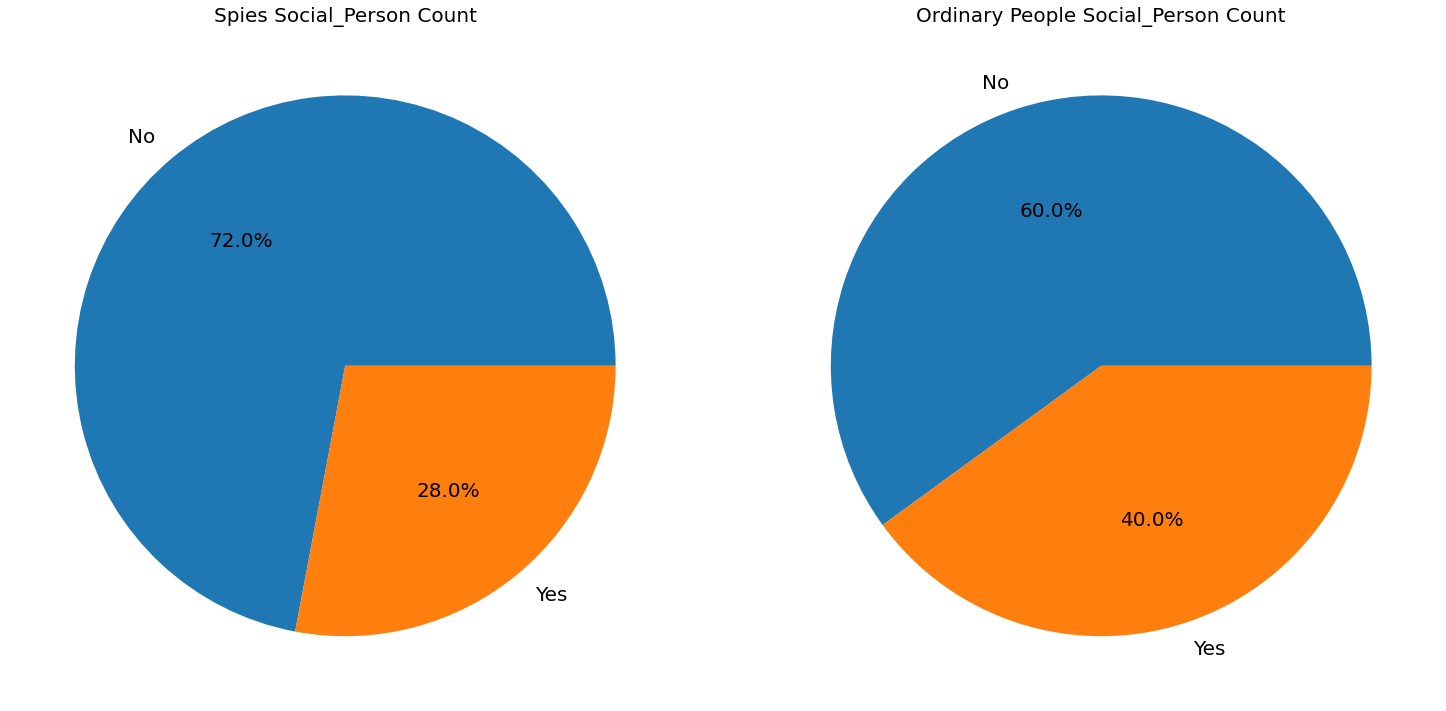

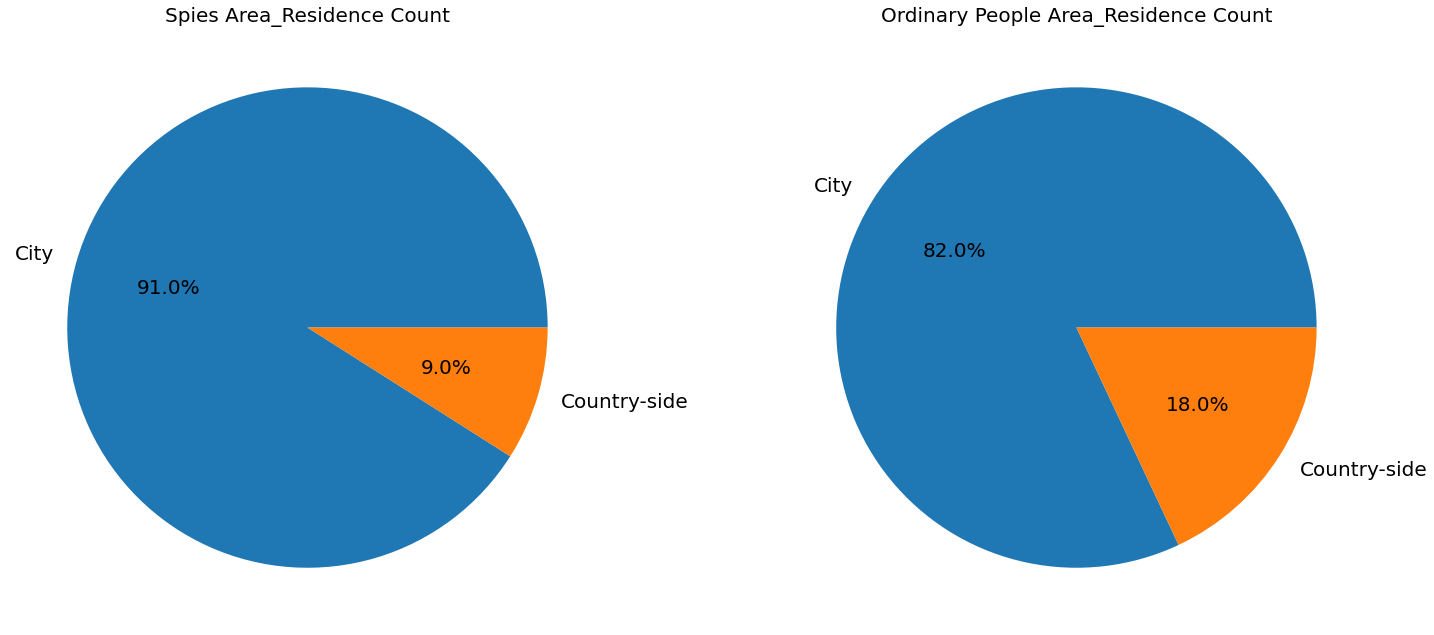

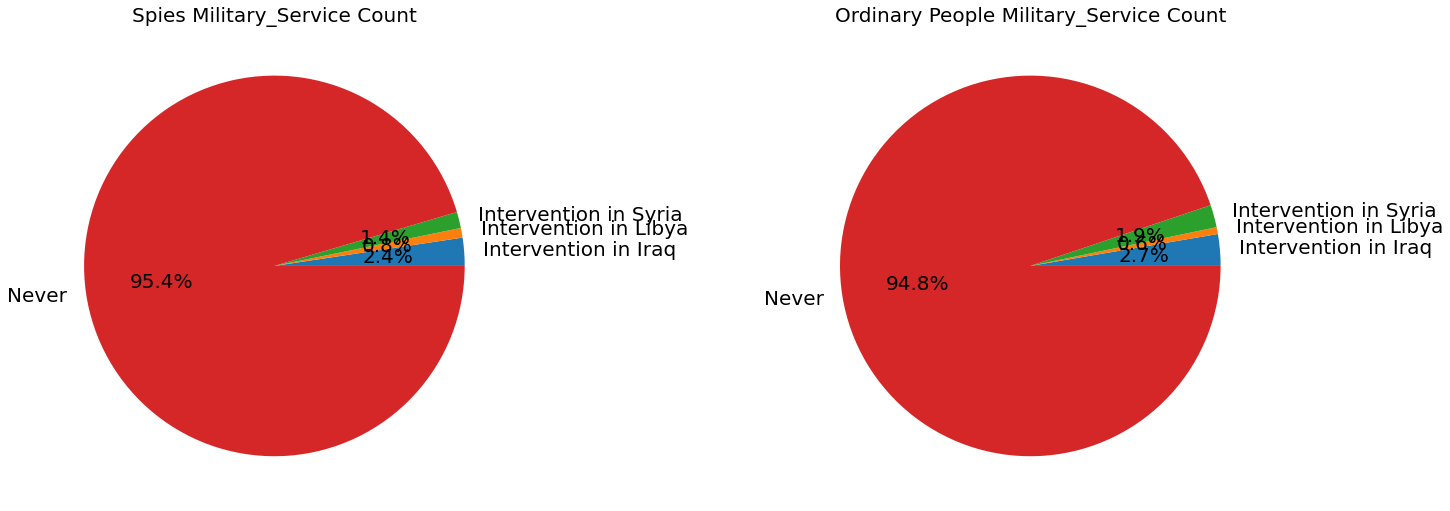

In [21]:
espionage_spies=espionage[espionage["Spy"]==1]
espionage_noSpies=espionage[espionage["Spy"]==0]
del espionage_spies["Spy"]
del espionage_noSpies["Spy"]

for k, v in categorical.items():
    plt.figure(figsize=(20,40))
    plt.subplot(1, 2, 1) 
    espionage_spies.groupby([k])[k].count().plot(kind='pie',fontsize=20, autopct='%1.1f%%').set_title("Spies "+k+" Count",fontsize=20)
    plt.ylabel(None)
    
    plt.subplot(1, 2, 2)
    espionage_noSpies.groupby([k])[k].count().plot(kind='pie',fontsize=20, autopct='%1.1f%%').set_title("Ordinary People "+k+" Count",fontsize=20)
    plt.ylabel(None)
    
    plt.tight_layout(pad=0.4, w_pad=8.0, h_pad=1.0)
    
    plt.show()

<h2>Data Quality Verification</h2>

In [22]:
espionage.isna().sum(axis = 0)

Gender                       0
Foreign_Citizenship        138
Age                          0
Frequent_Traveler           77
Cellphone_Usage              0
Household_Size             330
Spy                          0
Satisfaction_Level         330
Occupation                 124
Political_Participation    124
Social_Person               76
Area_Residence              76
Military_Service            76
Household_Income             0
dtype: int64

In [23]:
espionage_test.isna().sum(axis = 0)

Gender                      0
Foreign_Citizenship         7
Age                         0
Frequent_Traveler           3
Cellphone_Usage             0
Household_Size             17
Satisfaction_Level         17
Occupation                  4
Political_Participation     4
Social_Person               8
Area_Residence              8
Military_Service            8
Household_Income           36
dtype: int64

    
<h2>3. Data Preparation</h2>
    
<div>1) Check for Duplicates (before DATA ACCESS, EXPLORATION & UNDERSTANDING )</div>
   <div> 2) Coherency Check</div>
    <div>3) Outlier Treatment</div>
   <div> 4) Missing Values Treatment</div>
   <div> 5) Feature Engineering- new Variables creation</div>
  <div>  6) Encoding Categorical Variables</div>
 <div>   7) Normalization</div>
   <div> 8) Identify Correlations </div>
  


<h3>Coherency Check</h3>

In [24]:
df = espionage

coherenceCheck(categorical,"categorical")

* Values Out of the Domain Test *

* No Incoherence Found on Gender!*
* No Incoherence Found on Foreign_Citizenship!*
* No Incoherence Found on Frequent_Traveler!*
* No Incoherence Found on Cellphone_Usage!*
* No Incoherence Found on Occupation!*
* No Incoherence Found on Political_Participation!*
* No Incoherence Found on Social_Person!*
* No Incoherence Found on Area_Residence!*
* No Incoherence Found on Military_Service!*


In [25]:
coherenceCheck(defDomNumerical,"numerical")

* Values Out of the Domain Test *

* No Incoherence Found on Satisfaction_Level!*


<h3>Train Test Split</h3>

In [26]:
data = espionage.drop(['Spy'], axis=1)
target = espionage['Spy']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, stratify=target, random_state=5)

<h3>Outlier Treatment</h3>

Z-score Outlier Removal

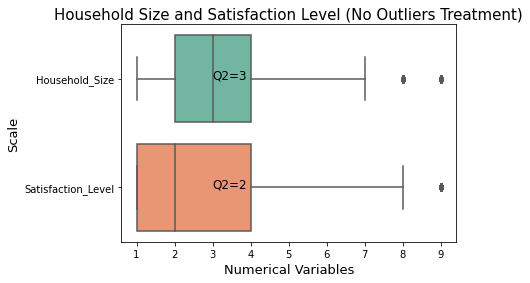

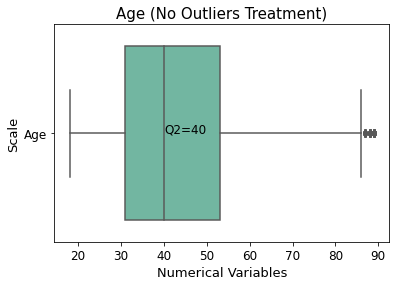

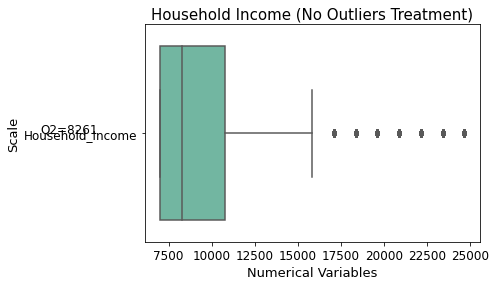

In [27]:
#Look for outliers from espionage through a visual evaluation using Boxplots

df_boxplot2 = sns.boxplot(data=X_train[['Household_Size','Satisfaction_Level']], orient="h", palette="Set2").set_title('Household Size and Satisfaction Level (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_pair")
addMedianBoxplot(X_train[['Household_Size','Satisfaction_Level']],"boxplot_pair")
plt.show()

df_boxplot2 = sns.boxplot(data=X_train[['Age']], orient="h", palette="Set2").set_title('Age (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_single")
addMedianBoxplot(X_train[['Age']],"boxplot_single")
plt.show()

df_boxplot2 = sns.boxplot(data=X_train[['Household_Income']], orient="h", palette="Set2").set_title('Household Income (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_single")
addMedianBoxplot(X_train[['Household_Income']],"boxplot_single")
plt.show()

In [28]:
thisColumns=X_train.describe().columns
select = X_train[thisColumns].copy()
zscoredf=select.apply(zscore)

threshold=3
conditions = [(abs(zscoredf["Age"]) > threshold) | (abs(zscoredf["Household_Size"]) > threshold) | (abs(zscoredf["Household_Income"]) > threshold)]
zscoredf["Outlier"] = np.select(conditions, [1], default=0)
print(zscoredf)

zscoredf["Outlier"].sum()

                  Age  Household_Size  Satisfaction_Level  Household_Income  \
ID_ORIGINAL                                                                   
465788      -1.284185             NaN                 NaN         -0.410861   
461896       0.142900             NaN                 NaN         -0.410861   
465820      -0.808490             NaN                 NaN         -0.711464   
459852      -0.213872             NaN                 NaN          1.392761   
463647      -0.332795             NaN                 NaN         -0.410861   
...               ...             ...                 ...               ...   
462259       0.440209             NaN                 NaN         -0.711464   
466500       0.261823             NaN                 NaN          0.190346   
465964       0.202361             NaN                 NaN         -0.110257   
460083       0.499671             NaN                 NaN          1.993968   
465987      -1.403109             NaN               

68

In [29]:
zscoredf=zscoredf[zscoredf['Outlier']==0]
zscoredf=zscoredf['Outlier']
X_train=X_train.merge(zscoredf, how='inner', on=["ID_ORIGINAL"])
del X_train['Outlier']

X_train

,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,
465788,Male,No,22,No,Low,6.0,1.0,Private company,Some involvement,Yes,Country-side,Never,8261
461896,Male,Yes,46,Yes,Low,1.0,5.0,Private company,Unknown,No,City,Never,8261
465820,Female,NaN,30,Yes,Average,4.0,1.0,NaN,NaN,Yes,Country-side,Never,7000
459852,Male,No,40,Yes,Low,1.0,4.0,Private company,Unknown,No,City,Never,15827
463647,Female,No,38,Yes,Low,1.0,4.0,Private company,No involvement,No,City,Never,8261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462259,Male,Yes,51,Yes,Low,2.0,3.0,Private company,Unknown,No,City,Never,7000
466500,Female,Yes,48,Yes,High,3.0,2.0,Private company,Unknown,Yes,Country-side,Never,10783
465964,Female,Yes,47,No,Low,1.0,5.0,Student,No involvement,No,City,Never,9522


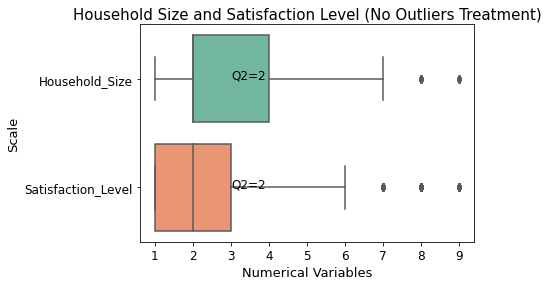

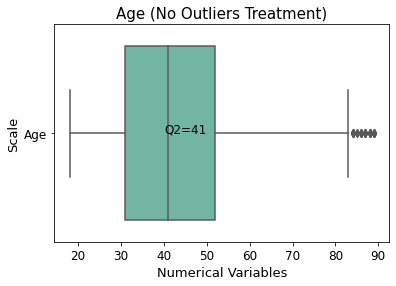

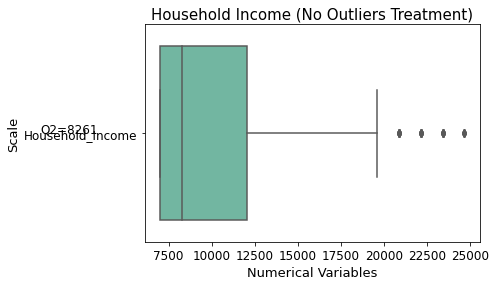

In [30]:
#Look for outliers from df, considering the Satisfaction variables through a visual evaluation using Boxplots

df_boxplot2 = sns.boxplot(data=X_test[['Household_Size','Satisfaction_Level']], orient="h", palette="Set2").set_title('Household Size and Satisfaction Level (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_pair")
addMedianBoxplot(X_test[['Household_Size','Satisfaction_Level']],"boxplot_pair")
plt.show()

df_boxplot2 = sns.boxplot(data=X_test[['Age']], orient="h", palette="Set2").set_title('Age (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_single")
addMedianBoxplot(X_test[['Age']],"boxplot_single")
plt.show()

df_boxplot2 = sns.boxplot(data=X_test[['Household_Income']], orient="h", palette="Set2").set_title('Household Income (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot0-10")
addMedianBoxplot(X_test[['Household_Income']],"boxplot_single")
plt.show()


In [31]:
thisColumns=X_test.describe().columns
select = X_test[thisColumns].copy()
zscoredf=select.apply(zscore)

threshold=3
conditions = [(abs(zscoredf["Age"]) > threshold) | (abs(zscoredf["Household_Size"]) > threshold) |  (abs(zscoredf["Household_Income"]) > threshold)]
zscoredf["Outlier"] = np.select(conditions, [1], default=0)
print(zscoredf)

zscoredf["Outlier"].sum()

                  Age  Household_Size  Satisfaction_Level  Household_Income  \
ID_ORIGINAL                                                                   
467072       1.184797             NaN                 NaN         -0.413124   
459305      -0.884141             NaN                 NaN          3.206577   
464676      -1.492653             NaN                 NaN         -0.413124   
466404      -0.214779             NaN                 NaN         -0.714765   
460939       2.645223             NaN                 NaN         -0.714765   
...               ...             ...                 ...               ...   
464379      -0.214779             NaN                 NaN          2.904936   
466807      -0.153928             NaN                 NaN         -0.714765   
466160       0.454583             NaN                 NaN         -0.413124   
464352       0.880541             NaN                 NaN         -0.714765   
462506      -0.762439             NaN               

22

In [32]:
zscoredf=zscoredf[zscoredf['Outlier']==0]
zscoredf=zscoredf['Outlier']
X_test=X_test.merge(zscoredf, how='inner', on=["ID_ORIGINAL"])
del X_test['Outlier']

X_test

,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,
467072,Male,Yes,63,No,High,3.0,3.0,Public company,No involvement,No,City,Never,8261
464676,Male,No,19,No,Low,6.0,1.0,Private company,Strong involvement,Yes,Country-side,Never,8261
466404,Female,No,40,Yes,Low,1.0,4.0,Private company,No involvement,No,City,Never,7000
460939,Female,Yes,87,Yes,Low,2.0,5.0,Self-employed,No involvement,No,City,Never,7000
463311,Female,No,18,No,Low,5.0,1.0,Private company,Some involvement,Yes,City,Never,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464379,Female,Yes,40,Yes,Average,3.0,2.0,Private company,No involvement,No,City,Never,22132
466807,Female,NaN,41,Yes,Low,1.0,5.0,Private company,Some involvement,Yes,Country-side,Never,7000
466160,Female,Yes,51,Yes,Average,2.0,3.0,Private company,No involvement,No,City,Never,8261


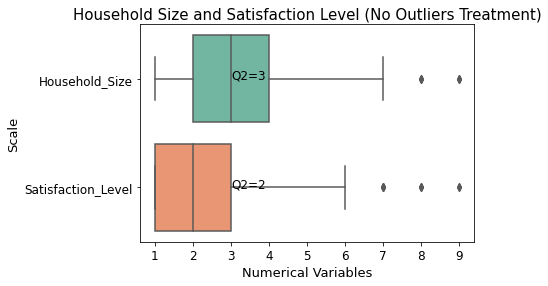

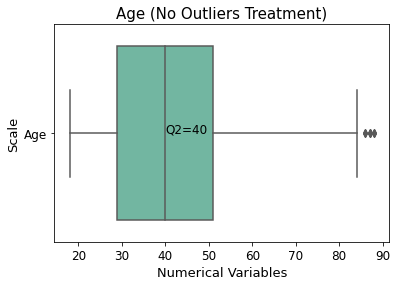

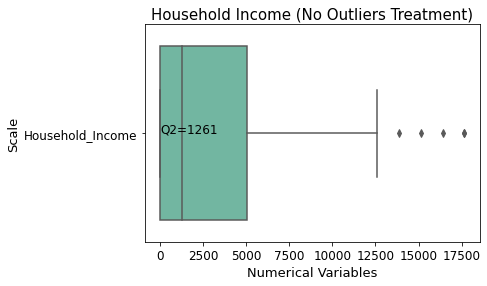

In [33]:
#Look for outliers from df, considering the Satisfaction variables through a visual evaluation using Boxplots

df_boxplot2 = sns.boxplot(data=espionage_test[['Household_Size','Satisfaction_Level']], orient="h", palette="Set2").set_title('Household Size and Satisfaction Level (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_pair")
addMedianBoxplot(espionage_test[['Household_Size','Satisfaction_Level']],"boxplot_pair")
plt.show()

df_boxplot2 = sns.boxplot(data=espionage_test[['Age']], orient="h", palette="Set2").set_title('Age (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_single")
addMedianBoxplot(espionage_test[['Age']],"boxplot_single")
plt.show()

df_boxplot2 = sns.boxplot(data=espionage_test[['Household_Income']], orient="h", palette="Set2").set_title('Household Income (No Outliers Treatment)',fontsize=15)
configureBoxplot("boxplot_single")
addMedianBoxplot(espionage_test[['Household_Income']],"boxplot_single")
plt.show()

In [34]:
thisColumns=espionage_test.describe().columns
select = espionage_test[thisColumns].copy()
zscoredf=select.apply(zscore)

threshold=3
conditions = [(abs(zscoredf["Age"]) > threshold) | (abs(zscoredf["Household_Size"]) > threshold) | (abs(zscoredf["Household_Income"]) > threshold)]
zscoredf["Outlier"] = np.select(conditions, [1], default=0)
print(zscoredf)

zscoredf["Outlier"].sum()

                  Age  Household_Size  Satisfaction_Level  Household_Income  \
ID_ORIGINAL                                                                   
460139      -0.970440             NaN                 NaN               NaN   
460648      -0.793267             NaN                 NaN               NaN   
460835      -0.852325             NaN                 NaN               NaN   
461613      -1.029498             NaN                 NaN               NaN   
461721      -0.970440             NaN                 NaN               NaN   
...               ...             ...                 ...               ...   
473596      -0.497978             NaN                 NaN               NaN   
477769       1.155640             NaN                 NaN               NaN   
475292       0.269773             NaN                 NaN               NaN   
472997       0.506004             NaN                 NaN               NaN   
475302      -0.025516             NaN               

0

In [35]:
zscoredf=zscoredf[zscoredf['Outlier']==0]
zscoredf=zscoredf['Outlier']
espionage_test=espionage_test.merge(zscoredf, how='inner', on=["ID_ORIGINAL"])
del espionage_test['Outlier']

espionage_test

,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,
460139,Male,No,26,No,Low,6.0,1.0,Private company,Unknown,Yes,City,Intervention in Libya,7566.0
460648,Female,NaN,29,No,Low,1.0,3.0,Nothing,No involvement,Yes,City,Intervention in Libya,10088.0
460835,Female,Yes,28,Yes,Low,1.0,3.0,Private company,Unknown,Yes,City,Intervention in Libya,0.0
461613,Female,No,25,Yes,Low,4.0,1.0,Private company,Some involvement,Yes,City,Intervention in Libya,10088.0
461721,Male,No,26,Yes,Low,5.0,1.0,Private company,Strong involvement,Yes,City,Intervention in Libya,8827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473596,Female,No,34,No,Low,5.0,1.0,Private company,Some involvement,NaN,NaN,NaN,1261.0
477769,Male,Yes,62,Yes,Average,2.0,4.0,Government,No involvement,No,City,Never,0.0
475292,Female,Yes,47,Yes,Average,3.0,2.0,Private company,Unknown,No,City,Never,6305.0


<h3>Missing Values Treatment</h3>

In [36]:
missingValuesIdent(X_train,'X_train')

****************************** Missing Values on  X_train  ******************************
                         Missing Values  Missing Values(%)
Foreign_Citizenship                 101           1.825741
Frequent_Traveler                    50           0.903832
Household_Size                      226           4.085322
Satisfaction_Level                  226           4.085322
Occupation                           82           1.482285
Political_Participation              82           1.482285
Social_Person                        52           0.939986
Area_Residence                       52           0.939986
Military_Service                     52           0.939986


In [37]:
missingValuesIdent(X_test,'X_test')

****************************** Missing Values on  X_test  ******************************
                         Missing Values  Missing Values(%)
Foreign_Citizenship                  35           1.471825
Frequent_Traveler                    27           1.135408
Household_Size                      101           4.247267
Satisfaction_Level                  101           4.247267
Occupation                           42           1.766190
Political_Participation              42           1.766190
Social_Person                        24           1.009251
Area_Residence                       24           1.009251
Military_Service                     24           1.009251


In [38]:
missingValuesIdent(espionage_test,'espionage_test')

****************************** Missing Values on  espionage_test  ******************************
                         Missing Values  Missing Values(%)
Foreign_Citizenship                   7           1.419878
Frequent_Traveler                     3           0.608519
Household_Size                       17           3.448276
Satisfaction_Level                   17           3.448276
Occupation                            4           0.811359
Political_Participation               4           0.811359
Social_Person                         8           1.622718
Area_Residence                        8           1.622718
Military_Service                      8           1.622718
Household_Income                     36           7.302231


In [39]:
#categorical
for i in ["Foreign_Citizenship", "Frequent_Traveler", "Occupation", 
          "Political_Participation","Social_Person", "Area_Residence", "Military_Service"]:
    X_train[i].fillna(X_train[i].mode()[0], inplace=True)
    
for i in ["Foreign_Citizenship", "Frequent_Traveler", "Occupation", 
          "Political_Participation","Social_Person", "Area_Residence", "Military_Service"]:
    X_test[i].fillna(X_train[i].mode()[0], inplace=True)
    
for i in ["Foreign_Citizenship", "Frequent_Traveler", "Occupation", 
          "Political_Participation","Social_Person", "Area_Residence", "Military_Service"]:
    espionage_test[i].fillna(X_train[i].mode()[0], inplace=True)

In [40]:
#Treating Missing Values through KNNImputer
X_train2 = X_train[["Age","Household_Size","Satisfaction_Level","Household_Income"]].copy()
X_train2.reset_index(level=0, inplace=True)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X_train2)
X_train2

X_train2 = pd.DataFrame(imputer.transform(X_train2),columns=X_train2.columns)
X_train2['ID_ORIGINAL'] = X_train2['ID_ORIGINAL'].astype('int64')
X_train2=X_train2.set_index("ID_ORIGINAL")
X_train2

X_train=X_train.drop(columns=["Age","Household_Size","Satisfaction_Level","Household_Income"],axis=0)
X_train = pd.concat([X_train, X_train2], axis=1)
X_train

,Gender,Foreign_Citizenship,Frequent_Traveler,Cellphone_Usage,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Age,Household_Size,Satisfaction_Level,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,
465788,Male,No,No,Low,Private company,Some involvement,Yes,Country-side,Never,22.0,6.0,1.0,8261.0
461896,Male,Yes,Yes,Low,Private company,Unknown,No,City,Never,46.0,1.0,5.0,8261.0
465820,Female,Yes,Yes,Average,Private company,No involvement,Yes,Country-side,Never,30.0,4.0,1.0,7000.0
459852,Male,No,Yes,Low,Private company,Unknown,No,City,Never,40.0,1.0,4.0,15827.0
463647,Female,No,Yes,Low,Private company,No involvement,No,City,Never,38.0,1.0,4.0,8261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462259,Male,Yes,Yes,Low,Private company,Unknown,No,City,Never,51.0,2.0,3.0,7000.0
466500,Female,Yes,Yes,High,Private company,Unknown,Yes,Country-side,Never,48.0,3.0,2.0,10783.0
465964,Female,Yes,No,Low,Student,No involvement,No,City,Never,47.0,1.0,5.0,9522.0


In [41]:
#Treating Missing Values through KNNImputer
X_test2 = X_test[["Age","Household_Size","Satisfaction_Level","Household_Income"]].copy()
X_test2.reset_index(level=0, inplace=True)

X_test2 = pd.DataFrame(imputer.transform(X_test2),columns=X_test2.columns)
X_test2['ID_ORIGINAL'] = X_test2['ID_ORIGINAL'].astype('int64')
X_test2=X_test2.set_index("ID_ORIGINAL")
X_test2

X_test=X_test.drop(columns=["Age","Household_Size","Satisfaction_Level","Household_Income"],axis=0)
X_test = pd.concat([X_test, X_test2], axis=1)
X_test

,Gender,Foreign_Citizenship,Frequent_Traveler,Cellphone_Usage,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Age,Household_Size,Satisfaction_Level,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,
467072,Male,Yes,No,High,Public company,No involvement,No,City,Never,63.0,3.0,3.0,8261.0
464676,Male,No,No,Low,Private company,Strong involvement,Yes,Country-side,Never,19.0,6.0,1.0,8261.0
466404,Female,No,Yes,Low,Private company,No involvement,No,City,Never,40.0,1.0,4.0,7000.0
460939,Female,Yes,Yes,Low,Self-employed,No involvement,No,City,Never,87.0,2.0,5.0,7000.0
463311,Female,No,No,Low,Private company,Some involvement,Yes,City,Never,18.0,5.0,1.0,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464379,Female,Yes,Yes,Average,Private company,No involvement,No,City,Never,40.0,3.0,2.0,22132.0
466807,Female,Yes,Yes,Low,Private company,Some involvement,Yes,Country-side,Never,41.0,1.0,5.0,7000.0
466160,Female,Yes,Yes,Average,Private company,No involvement,No,City,Never,51.0,2.0,3.0,8261.0


In [42]:
#Treating Missing Values through KNNImputer
espionage_test2 = espionage_test[["Age","Household_Size","Satisfaction_Level","Household_Income"]].copy()
espionage_test2.reset_index(level=0, inplace=True)

espionage_test2 = pd.DataFrame(imputer.transform(espionage_test2),columns=espionage_test2.columns)
espionage_test2['ID_ORIGINAL'] = espionage_test2['ID_ORIGINAL'].astype('int64')
espionage_test2=espionage_test2.set_index("ID_ORIGINAL")
espionage_test2

espionage_test=espionage_test.drop(columns=["Age","Household_Size","Satisfaction_Level","Household_Income"],axis=0)
espionage_test = pd.concat([espionage_test, espionage_test2], axis=1)
espionage_test

,Gender,Foreign_Citizenship,Frequent_Traveler,Cellphone_Usage,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Age,Household_Size,Satisfaction_Level,Household_Income
ID_ORIGINAL,,,,,,,,,,,,,
460139,Male,No,No,Low,Private company,Unknown,Yes,City,Intervention in Libya,26.0,6.0,1.0,7566.0
460648,Female,Yes,No,Low,Nothing,No involvement,Yes,City,Intervention in Libya,29.0,1.0,3.0,10088.0
460835,Female,Yes,Yes,Low,Private company,Unknown,Yes,City,Intervention in Libya,28.0,1.0,3.0,0.0
461613,Female,No,Yes,Low,Private company,Some involvement,Yes,City,Intervention in Libya,25.0,4.0,1.0,10088.0
461721,Male,No,Yes,Low,Private company,Strong involvement,Yes,City,Intervention in Libya,26.0,5.0,1.0,8827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473596,Female,No,No,Low,Private company,Some involvement,No,City,Never,34.0,5.0,1.0,1261.0
477769,Male,Yes,Yes,Average,Government,No involvement,No,City,Never,62.0,2.0,4.0,0.0
475292,Female,Yes,Yes,Average,Private company,Unknown,No,City,Never,47.0,3.0,2.0,6305.0


In [43]:
missingValuesIdent(X_train, 'X_train')

****************************** Missing Values on  X_train  ******************************
Empty DataFrame
Columns: [Missing Values, Missing Values(%)]
Index: []


In [44]:
missingValuesIdent(X_test, 'X_test')

****************************** Missing Values on  X_test  ******************************
Empty DataFrame
Columns: [Missing Values, Missing Values(%)]
Index: []


In [45]:
missingValuesIdent(espionage_test, 'espionage_test')

****************************** Missing Values on  espionage_test  ******************************
Empty DataFrame
Columns: [Missing Values, Missing Values(%)]
Index: []


<h3>Feature Engineering</h3>

In [46]:
X_train["age_category"] = 'Init'
X_train["age_category"].values[(X_train["Age"]<=30)] = 'Young'
X_train["age_category"].values[(X_train["Age"]>30)] = 'Adult'
X_train["age_category"].values[(X_train["Age"]>60)] = 'Senior'

X_train['Household_per_member'] = X_train['Household_Income']/X_train['Household_Size']

In [47]:
X_test["age_category"] = 'Init'
X_test["age_category"].values[(X_test["Age"]<=30)] = 'Young'
X_test["age_category"].values[(X_test["Age"]>30)] = 'Adult'
X_test["age_category"].values[(X_test["Age"]>60)] = 'Senior'

X_test['Household_per_member'] = X_test['Household_Income']/X_test['Household_Size']

In [48]:
espionage_test["age_category"] = 'Init'
espionage_test["age_category"].values[(espionage_test["Age"]<=30)] = 'Young'
espionage_test["age_category"].values[(espionage_test["Age"]>30)] = 'Adult'
espionage_test["age_category"].values[(espionage_test["Age"]>60)] = 'Senior'

espionage_test['Household_per_member'] = espionage_test['Household_Income']/espionage_test['Household_Size']

<h3>Encoding Categorical Variables: Getting Dummy columns approach</h3>

In [49]:
for i in [X_train,X_test,espionage_test]:
    i["age_category"].values[(i["age_category"]=='Young')] = 0
    i["age_category"].values[(i["age_category"]=='Adult')] = 1
    i["age_category"].values[(i["age_category"]=='Senior')] = 2
    i["age_category"]= i["age_category"].astype(np.int64)

In [50]:
X_train["Cellphone_Usage"].values[(X_train["Cellphone_Usage"]=='Low')] = 0
X_train["Cellphone_Usage"].values[(X_train["Cellphone_Usage"]=='Average')] = 1
X_train["Cellphone_Usage"].values[(X_train["Cellphone_Usage"]=='High')] = 2
X_train["Cellphone_Usage"]= X_train["Cellphone_Usage"].astype(np.int64)

for c in X_train.loc[:, ~X_train.columns.isin(X_train.describe().columns)].columns:
    X_train=pd.get_dummies(X_train)

X_train

,Cellphone_Usage,Age,Household_Size,Satisfaction_Level,Household_Income,age_category,Household_per_member,Gender_Female,Gender_Male,Foreign_Citizenship_No,...,Political_Participation_Strong involvement,Political_Participation_Unknown,Social_Person_No,Social_Person_Yes,Area_Residence_City,Area_Residence_Country-side,Military_Service_Intervention in Iraq,Military_Service_Intervention in Libya,Military_Service_Intervention in Syria,Military_Service_Never
ID_ORIGINAL,,,,,,,,,,,,,,,,,,,,,
465788,0,22.0,6.0,1.0,8261.0,0,1376.833333,0,1,1,...,0,0,0,1,0,1,0,0,0,1
461896,0,46.0,1.0,5.0,8261.0,1,8261.000000,0,1,0,...,0,1,1,0,1,0,0,0,0,1
465820,1,30.0,4.0,1.0,7000.0,0,1750.000000,1,0,0,...,0,0,0,1,0,1,0,0,0,1
459852,0,40.0,1.0,4.0,15827.0,1,15827.000000,0,1,1,...,0,1,1,0,1,0,0,0,0,1
463647,0,38.0,1.0,4.0,8261.0,1,8261.000000,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462259,0,51.0,2.0,3.0,7000.0,1,3500.000000,0,1,0,...,0,1,1,0,1,0,0,0,0,1
466500,2,48.0,3.0,2.0,10783.0,1,3594.333333,1,0,0,...,0,1,0,1,0,1,0,0,0,1
465964,0,47.0,1.0,5.0,9522.0,1,9522.000000,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [51]:
del X_train["Gender_Female"]
del X_train["Foreign_Citizenship_No"]
del X_train["Frequent_Traveler_No"]
del X_train["Occupation_Nothing"]
del X_train["Political_Participation_Unknown"]
del X_train["Social_Person_No"]
del X_train["Area_Residence_Country-side"]
del X_train["Military_Service_Never"]

In [52]:
X_test["Cellphone_Usage"].values[(X_test["Cellphone_Usage"]=='Low')] = 0
X_test["Cellphone_Usage"].values[(X_test["Cellphone_Usage"]=='Average')] = 1
X_test["Cellphone_Usage"].values[(X_test["Cellphone_Usage"]=='High')] = 2
X_test["Cellphone_Usage"]= X_test["Cellphone_Usage"].astype(np.int64)

for c in X_test.loc[:, ~X_test.columns.isin(X_test.describe().columns)].columns:
    X_test=pd.get_dummies(X_test)

X_test

,Cellphone_Usage,Age,Household_Size,Satisfaction_Level,Household_Income,age_category,Household_per_member,Gender_Female,Gender_Male,Foreign_Citizenship_No,...,Political_Participation_Strong involvement,Political_Participation_Unknown,Social_Person_No,Social_Person_Yes,Area_Residence_City,Area_Residence_Country-side,Military_Service_Intervention in Iraq,Military_Service_Intervention in Libya,Military_Service_Intervention in Syria,Military_Service_Never
ID_ORIGINAL,,,,,,,,,,,,,,,,,,,,,
467072,2,63.0,3.0,3.0,8261.0,2,2753.666667,0,1,0,...,0,0,1,0,1,0,0,0,0,1
464676,0,19.0,6.0,1.0,8261.0,0,1376.833333,0,1,1,...,1,0,0,1,0,1,0,0,0,1
466404,0,40.0,1.0,4.0,7000.0,1,7000.000000,1,0,1,...,0,0,1,0,1,0,0,0,0,1
460939,0,87.0,2.0,5.0,7000.0,2,3500.000000,1,0,0,...,0,0,1,0,1,0,0,0,0,1
463311,0,18.0,5.0,1.0,7000.0,0,1400.000000,1,0,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464379,1,40.0,3.0,2.0,22132.0,1,7377.333333,1,0,0,...,0,0,1,0,1,0,0,0,0,1
466807,0,41.0,1.0,5.0,7000.0,1,7000.000000,1,0,0,...,0,0,0,1,0,1,0,0,0,1
466160,1,51.0,2.0,3.0,8261.0,1,4130.500000,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [53]:
del X_test["Gender_Female"]
del X_test["Foreign_Citizenship_No"]
del X_test["Frequent_Traveler_No"]
del X_test["Occupation_Nothing"]
del X_test["Political_Participation_Unknown"]
del X_test["Social_Person_No"]
del X_test["Area_Residence_Country-side"]
del X_test["Military_Service_Never"]

In [54]:
espionage_test["Cellphone_Usage"].values[(espionage_test["Cellphone_Usage"]=='Low')] = 0
espionage_test["Cellphone_Usage"].values[(espionage_test["Cellphone_Usage"]=='Average')] = 1
espionage_test["Cellphone_Usage"].values[(espionage_test["Cellphone_Usage"]=='High')] = 2
espionage_test["Cellphone_Usage"]= espionage_test["Cellphone_Usage"].astype(np.int64)

for c in espionage_test.loc[:, ~espionage_test.columns.isin(espionage_test.describe().columns)].columns:
    espionage_test=pd.get_dummies(espionage_test)

espionage_test

,Cellphone_Usage,Age,Household_Size,Satisfaction_Level,Household_Income,age_category,Household_per_member,Gender_Female,Gender_Male,Foreign_Citizenship_No,...,Political_Participation_Strong involvement,Political_Participation_Unknown,Social_Person_No,Social_Person_Yes,Area_Residence_City,Area_Residence_Country-side,Military_Service_Intervention in Iraq,Military_Service_Intervention in Libya,Military_Service_Intervention in Syria,Military_Service_Never
ID_ORIGINAL,,,,,,,,,,,,,,,,,,,,,
460139,0,26.0,6.0,1.0,7566.0,0,1261.000000,0,1,1,...,0,1,0,1,1,0,0,1,0,0
460648,0,29.0,1.0,3.0,10088.0,0,10088.000000,1,0,0,...,0,0,0,1,1,0,0,1,0,0
460835,0,28.0,1.0,3.0,0.0,0,0.000000,1,0,0,...,0,1,0,1,1,0,0,1,0,0
461613,0,25.0,4.0,1.0,10088.0,0,2522.000000,1,0,1,...,0,0,0,1,1,0,0,1,0,0
461721,0,26.0,5.0,1.0,8827.0,0,1765.400000,0,1,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473596,0,34.0,5.0,1.0,1261.0,1,252.200000,1,0,1,...,0,0,1,0,1,0,0,0,0,1
477769,1,62.0,2.0,4.0,0.0,2,0.000000,0,1,0,...,0,0,1,0,1,0,0,0,0,1
475292,1,47.0,3.0,2.0,6305.0,1,2101.666667,1,0,0,...,0,1,1,0,1,0,0,0,0,1


In [55]:
del espionage_test["Gender_Female"]
del espionage_test["Foreign_Citizenship_No"]
del espionage_test["Frequent_Traveler_No"]
del espionage_test["Occupation_Nothing"]
del espionage_test["Political_Participation_Unknown"]
del espionage_test["Social_Person_No"]
del espionage_test["Area_Residence_Country-side"]
del espionage_test["Military_Service_Never"]

In [56]:
y_train = y_train[y_train.index.isin(X_train.index)]
y_train

ID_ORIGINAL
465788    0
461896    1
465820    1
459852    0
463647    0
         ..
462259    1
466500    1
465964    0
460083    1
465987    0
Name: Spy, Length: 5532, dtype: int64

In [57]:
y_test = y_test[y_test.index.isin(X_test.index)]
y_test

ID_ORIGINAL
467072    1
464676    1
466404    0
460939    1
463311    0
         ..
464379    1
466807    0
466160    1
464352    1
462506    1
Name: Spy, Length: 2378, dtype: int64

<h3>Normalization</h3>

In [58]:
#Create MinMaxScaler() scaler so that all variables are measured in the same scale
scaler = preprocessing.MinMaxScaler().fit(X_train)
scaler

#Per feature adjustment for minimum. Equivalent to min - X.min(axis=0) * self.scale_
print(scaler.min_)
print()

#Per feature relative scaling of the data. Equivalent to (max - min) / (X.max(axis=0) - X.min(axis=0))
print(scaler.scale_)

[ 0.         -0.25352113 -0.125      -0.125      -0.46259582  0.
 -0.03642267  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]

[5.00000000e-01 1.40845070e-02 1.25000000e-01 1.25000000e-01
 6.60851176e-05 5.00000000e-01 4.68291465e-05 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]


In [59]:
#Scale features of X_train and store it in variable df_scaled
df_scaled = scaler.transform(X_train)
df_scaled

X_train = pd.DataFrame(df_scaled, columns=X_train.columns, index=X_train.index)
X_train

,Cellphone_Usage,Age,Household_Size,Satisfaction_Level,Household_Income,age_category,Household_per_member,Gender_Male,Foreign_Citizenship_Yes,Frequent_Traveler_Yes,...,Occupation_Self-employed,Occupation_Student,Political_Participation_No involvement,Political_Participation_Some involvement,Political_Participation_Strong involvement,Social_Person_Yes,Area_Residence_City,Military_Service_Intervention in Iraq,Military_Service_Intervention in Libya,Military_Service_Intervention in Syria
ID_ORIGINAL,,,,,,,,,,,,,,,,,,,,,
465788,0.0,0.056338,0.625,0.000,0.083333,0.0,0.028053,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
461896,0.0,0.394366,0.000,0.500,0.083333,0.5,0.350433,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
465820,0.5,0.169014,0.375,0.000,0.000000,0.0,0.045528,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
459852,0.0,0.309859,0.000,0.375,0.583333,0.5,0.704742,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
463647,0.0,0.281690,0.000,0.375,0.083333,0.5,0.350433,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462259,0.0,0.464789,0.125,0.250,0.000000,0.5,0.127479,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
466500,1.0,0.422535,0.250,0.125,0.250000,0.5,0.131897,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
465964,0.0,0.408451,0.000,0.500,0.166667,0.5,0.409484,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
#Create MinMaxScaler() scaler so that all variables are measured in the same scale
scaler = preprocessing.MinMaxScaler().fit(X_test)
scaler

#Per feature adjustment for minimum. Equivalent to min - X.min(axis=0) * self.scale_
print(scaler.min_)
print()

#Per feature relative scaling of the data. Equivalent to (max - min) / (X.max(axis=0) - X.min(axis=0))
print(scaler.scale_)

[ 0.         -0.25352113 -0.125      -0.125      -0.46259582  0.
 -0.03642267  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]

[5.00000000e-01 1.40845070e-02 1.25000000e-01 1.25000000e-01
 6.60851176e-05 5.00000000e-01 4.68291465e-05 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]


In [61]:
#Scale features of X_test and store it in variable df_scaled
df_scaled = scaler.transform(X_test)
df_scaled

X_test = pd.DataFrame(df_scaled, columns=X_test.columns, index=X_test.index)
X_test

,Cellphone_Usage,Age,Household_Size,Satisfaction_Level,Household_Income,age_category,Household_per_member,Gender_Male,Foreign_Citizenship_Yes,Frequent_Traveler_Yes,...,Occupation_Self-employed,Occupation_Student,Political_Participation_No involvement,Political_Participation_Some involvement,Political_Participation_Strong involvement,Social_Person_Yes,Area_Residence_City,Military_Service_Intervention in Iraq,Military_Service_Intervention in Libya,Military_Service_Intervention in Syria
ID_ORIGINAL,,,,,,,,,,,,,,,,,,,,,
467072,1.0,0.633803,0.250,0.250,0.083333,1.0,0.092529,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
464676,0.0,0.014085,0.625,0.000,0.083333,0.0,0.028053,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
466404,0.0,0.309859,0.000,0.375,0.000000,0.5,0.291381,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
460939,0.0,0.971831,0.125,0.500,0.000000,1.0,0.127479,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
463311,0.0,0.000000,0.500,0.000,0.000000,0.0,0.029138,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464379,0.5,0.309859,0.250,0.125,1.000000,0.5,0.309052,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
466807,0.0,0.323944,0.000,0.500,0.000000,0.5,0.291381,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
466160,0.5,0.464789,0.125,0.250,0.083333,0.5,0.157005,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
#Create MinMaxScaler() scaler so that all variables are measured in the same scale
scaler = preprocessing.MinMaxScaler().fit(espionage_test)
scaler

#Per feature adjustment for minimum. Equivalent to min - X.min(axis=0) * self.scale_
print(scaler.min_)
print()

#Per feature relative scaling of the data. Equivalent to (max - min) / (X.max(axis=0) - X.min(axis=0))
print(scaler.scale_)

[ 0.         -0.25714286 -0.125      -0.125       0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]

[5.00000000e-01 1.42857143e-02 1.25000000e-01 1.25000000e-01
 5.66443865e-05 5.00000000e-01 7.20928556e-05 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]


In [63]:
#Scale features of espionage_test and store it in variable df_scaled
df_scaled = scaler.transform(espionage_test)
df_scaled

espionage_test = pd.DataFrame(df_scaled, columns=espionage_test.columns, index=espionage_test.index)
espionage_test

,Cellphone_Usage,Age,Household_Size,Satisfaction_Level,Household_Income,age_category,Household_per_member,Gender_Male,Foreign_Citizenship_Yes,Frequent_Traveler_Yes,...,Occupation_Self-employed,Occupation_Student,Political_Participation_No involvement,Political_Participation_Some involvement,Political_Participation_Strong involvement,Social_Person_Yes,Area_Residence_City,Military_Service_Intervention in Iraq,Military_Service_Intervention in Libya,Military_Service_Intervention in Syria
ID_ORIGINAL,,,,,,,,,,,,,,,,,,,,,
460139,0.0,0.114286,0.625,0.000,0.428571,0.0,0.090909,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
460648,0.0,0.157143,0.000,0.250,0.571429,0.0,0.727273,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
460835,0.0,0.142857,0.000,0.250,0.000000,0.0,0.000000,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
461613,0.0,0.100000,0.375,0.000,0.571429,0.0,0.181818,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
461721,0.0,0.114286,0.500,0.000,0.500000,0.0,0.127273,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473596,0.0,0.228571,0.500,0.000,0.071429,0.5,0.018182,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
477769,0.5,0.628571,0.125,0.375,0.000000,1.0,0.000000,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
475292,0.5,0.414286,0.250,0.125,0.357143,0.5,0.151515,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<h3>Feature Selection</h3>

<AxesSubplot:>

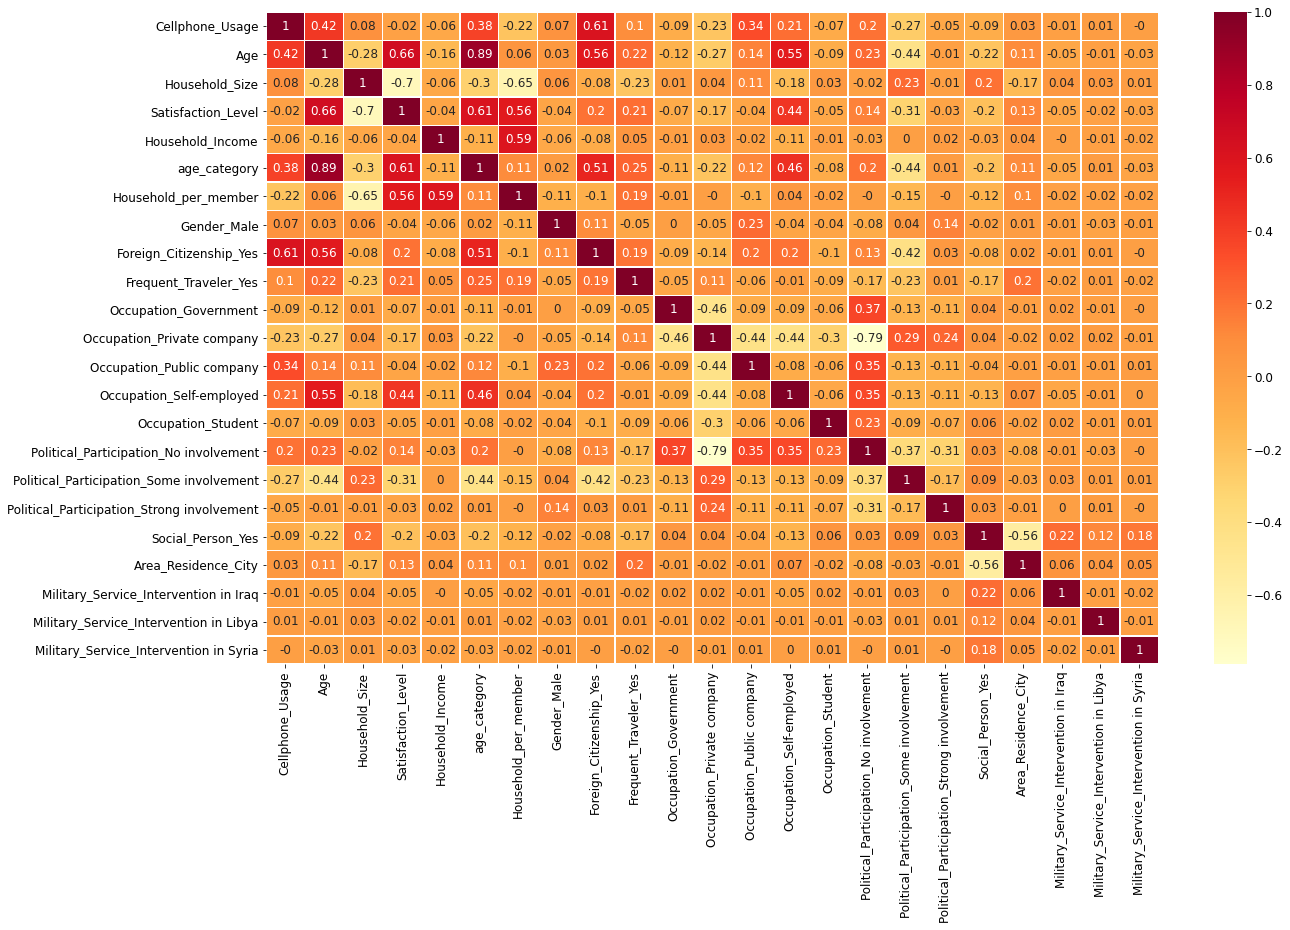

In [64]:
#Heatmap of pairwise correlation of all columns
plt.figure(figsize = (20,12))
sns.heatmap(X_train.corr().round(2), annot=True, linewidths=0.4, cmap="YlOrRd")

In [65]:
#The 'Occupation_Private company' has high negative correlation with 'Political Participation - No Involvement' 
# and so to avoid any multicollinearity it is dropped as well

for x in [X_test,X_train,espionage_test]:
    del x['Occupation_Private company']

<h4>ANOVA</h4>

In [66]:
anova = SelectKBest(f_classif, k=6)
X_anova = anova.fit_transform(X_train, y_train)
selected_features = pd.Series(anova.get_support(), index = X_train.columns)
selected_features[selected_features==True]


Cellphone_Usage                             True
Age                                         True
age_category                                True
Foreign_Citizenship_Yes                     True
Frequent_Traveler_Yes                       True
Political_Participation_Some involvement    True
dtype: bool

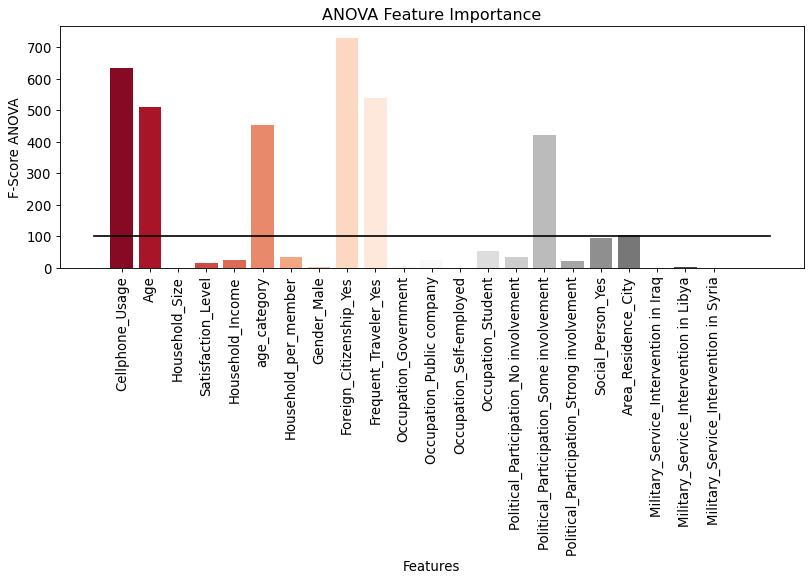

In [67]:
# plot the scores
pyplot.figure(figsize=(12,4), dpi=80)
pyplot.bar(X_train.columns, anova.scores_,color=sns.color_palette('RdGy',len(X_train.columns)))
pyplot.xticks(rotation=90)
pyplot.xlabel('Features')
pyplot.ylabel('F-Score ANOVA')
pyplot.title('ANOVA Feature Importance')
pyplot.plot([-1,len(X_train.columns)+1], [100,100],color='Black')
pyplot.show()

<h4>Ridge Classifier</h4>

In [68]:
ridge_logit =LogisticRegression(C=1, penalty='l2')
ridge_logit.fit(X_train, y_train)

LogisticRegression(C=1)

In [69]:
ridge_logit.coef_ 

array([[ 0.95230005,  2.2668558 ,  0.60628355, -1.41246406, -0.36689933,
         0.23427968, -0.14921766, -0.30613016,  0.42703602,  0.76167799,
         0.45241956,  0.08854821, -0.82417306, -0.38164489, -1.24625359,
        -1.52784067, -1.24844805, -0.0132261 ,  0.62944354, -0.02841631,
         0.06461418, -0.21098092]])

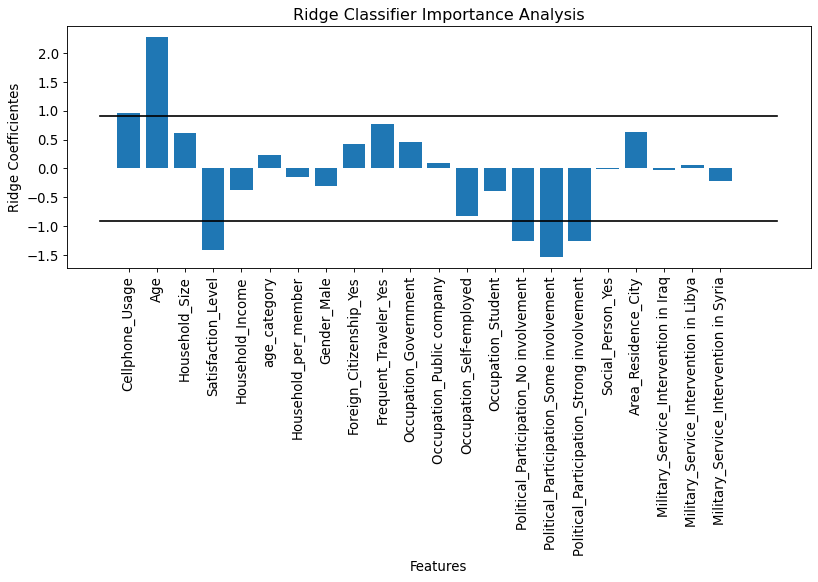

In [70]:
importance = ridge_logit.coef_[0]
pyplot.figure(figsize=(12,4), dpi=80)
plt.bar(X_train.columns, importance)
pyplot.xticks(rotation=90)
pyplot.xlabel('Features')
pyplot.ylabel('Ridge Coefficientes')
pyplot.title('Ridge Classifier Importance Analysis')
pyplot.plot([-1,len(X_train.columns)+1], [0.90,0.90],color='Black')
pyplot.plot([-1,len(X_train.columns)+1], [-0.90,-0.90],color='Black')
plt.show()

<h4>Chi²</h4>

In [71]:
chi2_features = SelectKBest(chi2, k = 6)
X_kbest_features = chi2_features.fit_transform(X_train, y_train)

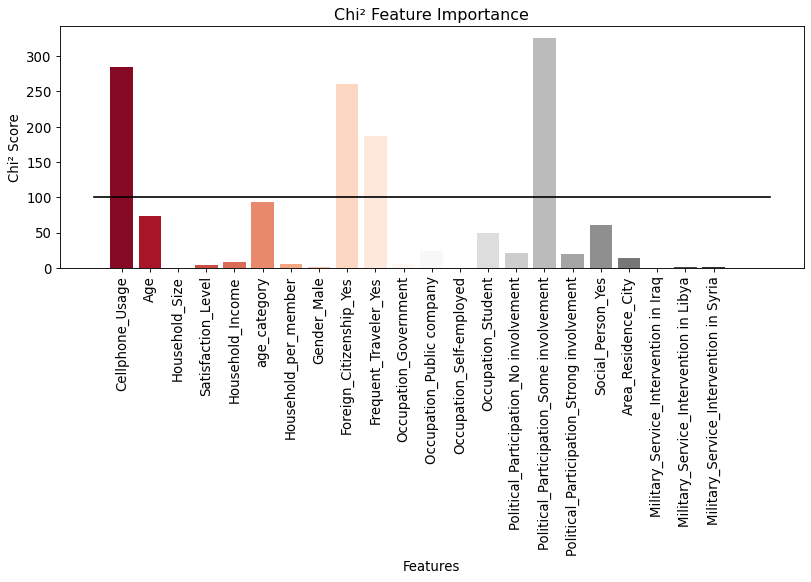

In [72]:
chi2_features.scores_



# plot the scores
pyplot.figure(figsize=(12,4), dpi=80)
pyplot.bar(X_train.columns, chi2_features.scores_,color=sns.color_palette('RdGy',len(X_train.columns)))
pyplot.xticks(rotation=90)
pyplot.xlabel('Features')
pyplot.ylabel('Chi² Score')
pyplot.title('Chi² Feature Importance')
pyplot.plot([-1,len(X_train.columns)+1], [100,100],color='Black')
pyplot.show()

<h4>Best 6 Features from Ridge Classifier</h4>

In [73]:
X_train = X_train[['Cellphone_Usage','Age','Satisfaction_Level','Political_Participation_No involvement','Political_Participation_Some involvement','Political_Participation_Strong involvement']]
X_test = X_test[['Cellphone_Usage','Age','Satisfaction_Level','Political_Participation_No involvement','Political_Participation_Some involvement','Political_Participation_Strong involvement']]
espionage_test = espionage_test[['Cellphone_Usage','Age','Satisfaction_Level','Political_Participation_No involvement','Political_Participation_Some involvement','Political_Participation_Strong involvement']]

<h2>4. Modelling</h2>

In [74]:

#Define classification

def print_classification(y_test, y_pred):
    # Classification Report
    print(classification_report(y_test, y_pred))
    
    # Plot
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (5,3))
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Greens')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

<h3>Bayesian and Instance Based Classifiers</h3>

#### NAIVE BAYES

In [75]:
modelNB = GaussianNB()

In [76]:
modelNB.fit(X = X_train, y = y_train)

GaussianNB()

In [77]:
labels_train = modelNB.predict(X_train)
labels_test = modelNB.predict(X_test)
modelNB_pred = modelNB.predict(X_test)

In [78]:
modelNB.score(X_train, y_train)

0.6988430947216197

In [79]:
modelNB.score(X_test, y_test)

0.6951219512195121

In [80]:
modelNB.class_prior_

array([0.52042661, 0.47957339])

In [81]:
modelNB.class_count_

array([2879., 2653.])

In [82]:
modelNB.theta_

array([[0.16273011, 0.29541752, 0.19327023, 0.4428621 , 0.26085446,
        0.14067385],
       [0.40162081, 0.43357772, 0.21645307, 0.36486996, 0.06294761,
        0.09950999]])

In [83]:
pd.DataFrame(data=modelNB.theta_, columns=X_train.columns).T

,0,1
Cellphone_Usage,0.162730,0.401621
Age,0.295418,0.433578
Satisfaction_Level,0.193270,0.216453
Political_Participation_No involvement,0.442862,0.364870
Political_Participation_Some involvement,0.260854,0.062948
Political_Participation_Strong involvement,0.140674,0.099510


In [84]:
pd.DataFrame(data=modelNB.sigma_, columns=X_train.columns).T

,0,1
Cellphone_Usage,0.109069,0.140906
Age,0.059386,0.042984
Satisfaction_Level,0.052121,0.036418
Political_Participation_No involvement,0.246735,0.231740
Political_Participation_Some involvement,0.192809,0.058985
Political_Participation_Strong involvement,0.120885,0.089608


In [85]:
modelNB_pred = modelNB.predict(X_test)

In [86]:
espionage_test

,Cellphone_Usage,Age,Satisfaction_Level,Political_Participation_No involvement,Political_Participation_Some involvement,Political_Participation_Strong involvement
ID_ORIGINAL,,,,,,
460139,0.0,0.114286,0.000,0.0,0.0,0.0
460648,0.0,0.157143,0.250,1.0,0.0,0.0
460835,0.0,0.142857,0.250,0.0,0.0,0.0
461613,0.0,0.100000,0.000,0.0,1.0,0.0
461721,0.0,0.114286,0.000,0.0,0.0,1.0
...,...,...,...,...,...,...
473596,0.0,0.228571,0.000,0.0,1.0,0.0
477769,0.5,0.628571,0.375,1.0,0.0,0.0
475292,0.5,0.414286,0.125,0.0,0.0,0.0


#### KNN Classifier

In [87]:
modelKNN = KNeighborsClassifier()

In [88]:
modelKNN.fit(X = X_train, y = y_train)

KNeighborsClassifier()

In [89]:
labels_train = modelKNN.predict(X_train)
labels_test = modelKNN.predict(X_test)
modelKNN_pred = modelKNN.predict(X_test)

In [90]:
modelKNN.score(X_train, y_train)

0.7642805495300072

In [91]:
modelKNN.score(X_test, y_test)

0.7056349873843566

In [92]:
modelKNN.classes_

array([0, 1], dtype=int64)

In [93]:
modelKNN.effective_metric_

'euclidean'

__Number of Neighbors = 3__

In [94]:
modelKNN3 = KNeighborsClassifier(n_neighbors=3).fit(X = X_train, y = y_train)
print(modelKNN3.score(X_train, y_train))
print(modelKNN3.score(X_test, y_test))

0.7581344902386117
0.6846089150546678


__Number of Neighbors = 100__

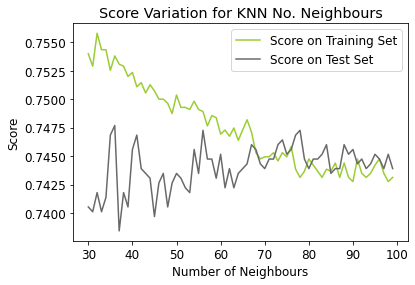

In [95]:
scores_train = []
scores_test = []
max_depth_list = range(30,100)

for i in max_depth_list:
    DTC = KNeighborsClassifier(n_neighbors=i)
    DTC.fit(X_train, y_train)
    scores_train.append(DTC.score(X_train, y_train))
    scores_test.append(DTC.score(X_test, y_test))
    
plt.plot(max_depth_list, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(max_depth_list, scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Number of Neighbours")
plt.ylabel("Score")
plt.title("Score Variation for KNN No. Neighbours")
plt.legend()
plt.show()

In [96]:
modelKNN100 = KNeighborsClassifier(n_neighbors=75).fit(X = X_train, y = y_train)
print(modelKNN100.score(X_train, y_train))
print(modelKNN100.score(X_test, y_test))
modelKNN100_pred= modelKNN100.predict(X_test)

0.7449385394070861
0.7451640033641715


__Changing the distance metric__

In [97]:
modelKNNM = KNeighborsClassifier(metric='manhattan')
modelKNNM.fit(X = X_train, y = y_train)
print(modelKNNM.score(X_train, y_train))
print(modelKNNM.score(X_test, y_test))
modelKNNM_pred= modelKNNM.predict(X_test)

0.7640997830802603
0.7052144659377628


__Distance Weighted KNN__

In [98]:
modelKNNW= KNeighborsClassifier(weights='distance')
modelKNNW.fit(X = X_train, y = y_train)
print(modelKNNW.score(X_train, y_train))
print(modelKNNW.score(X_test, y_test))
modelKNNW_pred= modelKNNW.predict(X_test)

0.7922993492407809
0.6921783010933558


<h3>Decision Trees</h3>

In [99]:
modelDT = DecisionTreeClassifier()

In [100]:
modelDT.fit(X_train, y_train)
modelDT_pred = modelDT.predict(X_test)

In [101]:
modelDT.score(X_train, y_train)

0.804410701373825

In [102]:
modelDT.score(X_test, y_test)

0.7073170731707317

__Feature Importance for Decision Tree__

In [103]:
modelDT.feature_importances_

array([0.33135261, 0.39227642, 0.12794614, 0.0568775 , 0.04185578,
       0.04969155])

In [104]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(7,3.5))
    plt.barh(range(n_features), model.feature_importances_, color='yellowgreen')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.show()

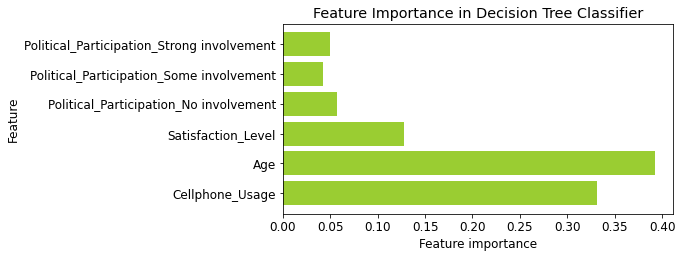

In [105]:
plot_feature_importances(modelDT)

__Changing the criterion for the DT__

In [106]:
modelDT_entropy = DecisionTreeClassifier(criterion='entropy')
modelDT_entropy.fit(X_train, y_train)
modelDT_entropy_pred = modelDT_entropy.predict(X_test)

In [107]:
modelDT_entropy.score(X_train, y_train)

0.804410701373825

In [108]:
modelDT_entropy.score(X_test, y_test)

0.7073170731707317

__Changing Maximum Depth of the Tree__

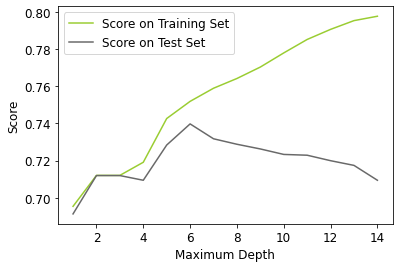

In [109]:
scores_train = []
scores_test = []
max_depth_list = range(1,15)

for i in max_depth_list:
    DTC = DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train, y_train)
    scores_train.append(DTC.score(X_train, y_train))
    scores_test.append(DTC.score(X_test, y_test))
    
plt.plot(max_depth_list, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(max_depth_list, scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [110]:
modelDT_maxdepth5 = DecisionTreeClassifier(max_depth=6)
modelDT_maxdepth5.fit(X_train, y_train)
print(modelDT_maxdepth5.score(X_train, y_train))
print(modelDT_maxdepth5.score(X_test, y_test))
modelDT_maxdepth_pred = modelDT_maxdepth5.predict(X_test)

0.7518076644974693
0.7396972245584524


__Changing the Number of Leaf Nodes__

In [111]:
scores_train = []
scores_test = []
max_leaf_nodes_list = range(5,30)

for i in max_leaf_nodes_list:
    DTC = DecisionTreeClassifier(max_leaf_nodes=i)
    DTC.fit(X_train, y_train)
    scores_train.append(DTC.score(X_train, y_train))
    scores_test.append(DTC.score(X_test, y_test))

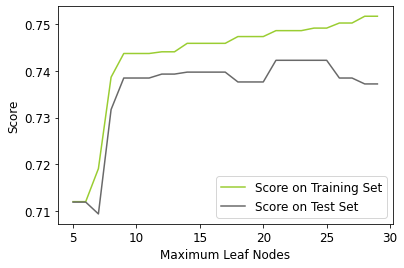

In [112]:
plt.plot(max_leaf_nodes_list, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(max_leaf_nodes_list, scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Leaf Nodes")
plt.ylabel("Score")
plt.legend()
plt.show()

In [113]:
modelDT_leafs13 = DecisionTreeClassifier(max_leaf_nodes=21)
modelDT_leafs13.fit(X_train, y_train)
modelDT_leafs13_pred = modelDT_leafs13.predict(X_test)

In [114]:
modelDT_leafs13.score(X_train, y_train)

0.7485538684020245

In [115]:
modelDT_leafs13.score(X_test, y_test)

0.7422203532380152

<h3>Ensemble Classifiers</h3>

In [116]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X = X_train, y = y_train)
print(modelDT.score(X_train, y_train))
print(modelDT.score(X_test, y_test))

0.804410701373825
0.7068965517241379


In [117]:
y_pred_DT = modelDT.predict(X_test)

__Bagging over KNN__

In [118]:
bagging_KNN100 = BaggingClassifier(base_estimator = modelKNN100)
bagging_KNN100.fit(X = X_train, y = y_train)
print(bagging_KNN100.score(X_train, y_train))
print(bagging_KNN100.score(X_test, y_test))
bagging_KNN100_pred = bagging_KNN100.predict(X_test)

0.7427693420101229
0.7455845248107653


__Bagging over Decision Trees__

In [119]:
bagging_DT = BaggingClassifier(base_estimator = modelDT)

In [120]:
bagging_DT.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [121]:
print(bagging_DT.score(X_train, y_train))
print(bagging_DT.score(X_test, y_test))

0.7991684743311641
0.7106812447434819


In [122]:
y_pred_bagging = bagging_DT.predict(X_test)

__Changing the number of estimators__

Estimators:  5
Accuracy score (training): 0.792
Accuracy score (validation): 0.707

Estimators:  10
Accuracy score (training): 0.799
Accuracy score (validation): 0.707

Estimators:  15
Accuracy score (training): 0.801
Accuracy score (validation): 0.704

Estimators:  20
Accuracy score (training): 0.802
Accuracy score (validation): 0.711

Estimators:  25
Accuracy score (training): 0.803
Accuracy score (validation): 0.713

Estimators:  30
Accuracy score (training): 0.804
Accuracy score (validation): 0.709

Estimators:  35
Accuracy score (training): 0.804
Accuracy score (validation): 0.710

Estimators:  40
Accuracy score (training): 0.804
Accuracy score (validation): 0.712



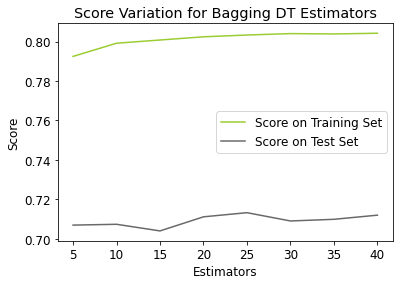

In [123]:
scores_train = []
scores_test = []
estimators = [5,10,15,20,25,30,35,40]

for estimator in estimators:
    bagging_DT_40 = BaggingClassifier(base_estimator = modelDT, n_estimators = estimator, random_state = 5)
    bagging_DT_40.fit(X_train, y_train)
    print("Estimators: ", estimator)
    print("Accuracy score (training): {0:.3f}".format(bagging_DT_40.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(bagging_DT_40.score(X_test, y_test)))
    print()
    scores_train.append(bagging_DT_40.score(X_train, y_train))
    scores_test.append(bagging_DT_40.score(X_test, y_test))
    
    
plt.plot(estimators, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(estimators, scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.title("Score Variation for Bagging DT Estimators")
plt.legend()
plt.show()

In [124]:
bagging_DT_40 = BaggingClassifier(base_estimator = modelDT, n_estimators = 25, random_state = 5)
bagging_DT_40.fit(X = X_train, y = y_train)
print(bagging_DT_40.score(X_train, y_train))
print(bagging_DT_40.score(X_test, y_test))
bagging_DT_40_pred = bagging_DT_40.predict(X_test)

0.8033261026753434
0.7132043734230445


__Changing the number of samples__

In [125]:
bagging_DT_s = BaggingClassifier(base_estimator = modelDT, max_samples = 0.5, random_state = 5)
bagging_DT_s.fit(X = X_train, y = y_train)
print(bagging_DT_s.score(X_train, y_train))
print(bagging_DT_s.score(X_test, y_test))
bagging_DT_s_pred = bagging_DT_s.predict(X_test)

0.7885032537960954
0.7169890664423886


__Changing the way samples are drawn__

In [126]:
bagging_DT_b = BaggingClassifier(base_estimator = modelDT, bootstrap = False, random_state = 5)
bagging_DT_b.fit(X = X_train, y = y_train)
print(bagging_DT_b.score(X_train, y_train))
print(bagging_DT_b.score(X_test, y_test))
bagging_DT_b_pred = bagging_DT_b.predict(X_test)

0.804410701373825
0.7073170731707317


<h3>Neural Networks</h3>

Solver:  lbfgs
LR:  0.01
Accuracy score (training): 0.755
Accuracy score (validation): 0.749

Solver:  lbfgs
LR:  0.05
Accuracy score (training): 0.752
Accuracy score (validation): 0.750

Solver:  lbfgs
LR:  0.1
Accuracy score (training): 0.752
Accuracy score (validation): 0.747

Solver:  lbfgs
LR:  0.2
Accuracy score (training): 0.749
Accuracy score (validation): 0.752

Solver:  lbfgs
LR:  0.25
Accuracy score (training): 0.749
Accuracy score (validation): 0.749

Solver:  lbfgs
LR:  0.3
Accuracy score (training): 0.750
Accuracy score (validation): 0.750

Solver:  lbfgs
LR:  0.35
Accuracy score (training): 0.750
Accuracy score (validation): 0.749

Solver:  lbfgs
LR:  0.4
Accuracy score (training): 0.750
Accuracy score (validation): 0.746

Solver:  lbfgs
LR:  0.5
Accuracy score (training): 0.751
Accuracy score (validation): 0.750

Solver:  lbfgs
LR:  0.75
Accuracy score (training): 0.752
Accuracy score (validation): 0.747

Solver:  lbfgs
LR:  1
Accuracy score (training): 0.752
Accuracy s

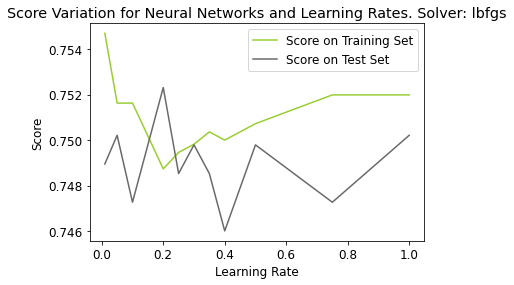

Solver:  sgd
LR:  0.01
Accuracy score (training): 0.745
Accuracy score (validation): 0.748

Solver:  sgd
LR:  0.05
Accuracy score (training): 0.751
Accuracy score (validation): 0.750

Solver:  sgd
LR:  0.1
Accuracy score (training): 0.747
Accuracy score (validation): 0.743

Solver:  sgd
LR:  0.2
Accuracy score (training): 0.742
Accuracy score (validation): 0.746

Solver:  sgd
LR:  0.25
Accuracy score (training): 0.751
Accuracy score (validation): 0.745

Solver:  sgd
LR:  0.3
Accuracy score (training): 0.752
Accuracy score (validation): 0.745

Solver:  sgd
LR:  0.35
Accuracy score (training): 0.751
Accuracy score (validation): 0.745

Solver:  sgd
LR:  0.4
Accuracy score (training): 0.744
Accuracy score (validation): 0.749

Solver:  sgd
LR:  0.5
Accuracy score (training): 0.753
Accuracy score (validation): 0.749

Solver:  sgd
LR:  0.75
Accuracy score (training): 0.746
Accuracy score (validation): 0.745

Solver:  sgd
LR:  1
Accuracy score (training): 0.745
Accuracy score (validation): 0.7

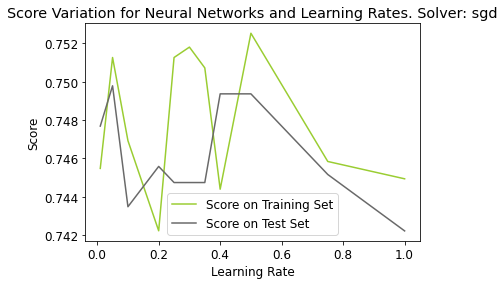

Solver:  adam
LR:  0.01
Accuracy score (training): 0.748
Accuracy score (validation): 0.749

Solver:  adam
LR:  0.05
Accuracy score (training): 0.744
Accuracy score (validation): 0.744

Solver:  adam
LR:  0.1
Accuracy score (training): 0.745
Accuracy score (validation): 0.739

Solver:  adam
LR:  0.2
Accuracy score (training): 0.741
Accuracy score (validation): 0.735

Solver:  adam
LR:  0.25
Accuracy score (training): 0.725
Accuracy score (validation): 0.708

Solver:  adam
LR:  0.3
Accuracy score (training): 0.745
Accuracy score (validation): 0.743

Solver:  adam
LR:  0.35
Accuracy score (training): 0.735
Accuracy score (validation): 0.727

Solver:  adam
LR:  0.4
Accuracy score (training): 0.715
Accuracy score (validation): 0.708

Solver:  adam
LR:  0.5
Accuracy score (training): 0.687
Accuracy score (validation): 0.682

Solver:  adam
LR:  0.75
Accuracy score (training): 0.729
Accuracy score (validation): 0.722

Solver:  adam
LR:  1
Accuracy score (training): 0.717
Accuracy score (valid

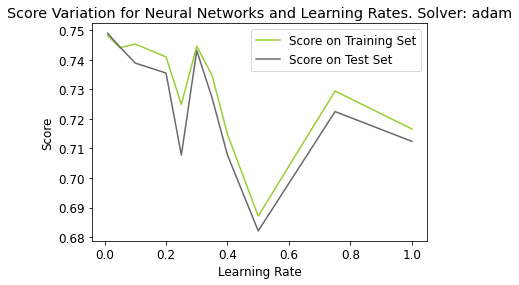

In [172]:
scores_train = []
scores_test = []
solvers= ['lbfgs','sgd','adam']
learning_rates = [0.01, 0.05, 0.1,0.2, 0.25,0.3,0.35,0.4, 0.5, 0.75, 1]

for solver in solvers:
    for learning_rate in learning_rates:
        modelNN = MLPClassifier(solver=solver, learning_rate_init = learning_rate)
        modelNN.fit(X_train, y_train)
        print("Solver: ", solver)
        print("LR: ", learning_rate)
        print("Accuracy score (training): {0:.3f}".format(modelNN.score(X_train, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(modelNN.score(X_test, y_test)))
        print()
        scores_train.append(modelNN.score(X_train, y_train))
        scores_test.append(modelNN.score(X_test, y_test))
        
    plt.plot(learning_rates, scores_train, label="Score on Training Set", color='yellowgreen')
    plt.plot(learning_rates, scores_test, label="Score on Test Set", color='dimgray')
    plt.xlabel("Learning Rate")
    plt.ylabel("Score")
    plt.title("Score Variation for Neural Networks and Learning Rates. Solver: "+solver)
    plt.legend()
    plt.show()
    scores_train = []
    scores_test = []

In [128]:
modelNN = MLPClassifier(solver='lbfgs', learning_rate_init = 0.01)
modelNN.fit(X_train, y_train)
print("Solver: ", 'lbfgs')
print("LR: ", 0.01)
print("Accuracy score (training): {0:.3f}".format(modelNN.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(modelNN.score(X_test, y_test)))
print()
modelNN_pred = modelNN.predict(X_test)

Solver:  lbfgs
LR:  0.01
Accuracy score (training): 0.749
Accuracy score (validation): 0.755



In [129]:
modelNN.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

<h3>Methods from outside class</h3>

<h4>Voting Classifier</h4>

In [130]:
# group / ensemble of models
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=75)))
estimator.append(('DTC', DecisionTreeClassifier(max_depth=6)))
estimator.append(('DTC2', DecisionTreeClassifier(max_leaf_nodes=13)))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
hard_pred = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, hard_pred)
print("Hard Voting Score % d" % score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
soft_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_test, soft_pred)
print("Soft Voting Score % d" % score)

Hard Voting Score  0
Soft Voting Score  0


In [131]:
print(vot_soft.score(X_train, y_train))
print(vot_soft.score(X_test, y_test))

0.7485538684020245
0.7455845248107653


In [132]:
print(vot_hard.score(X_train, y_train))
print(vot_hard.score(X_test, y_test))

0.7471077368040492
0.7447434819175778


<h4>Gradient Boosting</h4>

Learning rate:  0.01
Accuracy score (training): 0.738
Accuracy score (validation): 0.738

Learning rate:  0.05
Accuracy score (training): 0.748
Accuracy score (validation): 0.738

Learning rate:  0.1
Accuracy score (training): 0.757
Accuracy score (validation): 0.743

Learning rate:  0.2
Accuracy score (training): 0.759
Accuracy score (validation): 0.741

Learning rate:  0.25
Accuracy score (training): 0.760
Accuracy score (validation): 0.740

Learning rate:  0.3
Accuracy score (training): 0.762
Accuracy score (validation): 0.741

Learning rate:  0.35
Accuracy score (training): 0.766
Accuracy score (validation): 0.743

Learning rate:  0.4
Accuracy score (training): 0.768
Accuracy score (validation): 0.741

Learning rate:  0.5
Accuracy score (training): 0.769
Accuracy score (validation): 0.737

Learning rate:  0.75
Accuracy score (training): 0.774
Accuracy score (validation): 0.740

Learning rate:  1
Accuracy score (training): 0.776
Accuracy score (validation): 0.726



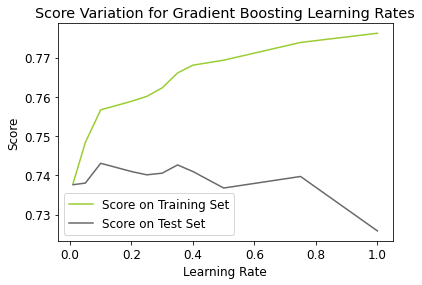

In [133]:
scores_train = []
scores_test = []
learning_rates = [0.01, 0.05, 0.1,0.2, 0.25,0.3,0.35,0.4, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    modelGB = GradientBoostingClassifier(learning_rate = learning_rate)
    modelGB.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(modelGB.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(modelGB.score(X_test, y_test)))
    print()
    scores_train.append(modelGB.score(X_train, y_train))
    scores_test.append(modelGB.score(X_test, y_test))
    
    
plt.plot(learning_rates, scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(learning_rates, scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.title("Score Variation for Gradient Boosting Learning Rates")
plt.legend()
plt.show()

In [142]:
#Best Result
modelGB = GradientBoostingClassifier(learning_rate = 0.1)
modelGB.fit(X_train, y_train)
print("Learning rate: ", 0.1)
print("Accuracy score (training): {0:.4f}".format(modelGB.score(X_train, y_train)))
print("Accuracy score (validation): {0:.4f}".format(modelGB.score(X_test, y_test)))
modelGB_pred = modelGB.predict(X_test)

Learning rate:  0.1
Accuracy score (training): 0.7567
Accuracy score (validation): 0.7431


<h3>Grid Search</h3>

<h4>Neural Networks - Grid Search</h4>

In [135]:
param_grid = [
        {
            'activation' : ['tanh', 'relu'],
            'learning_rate_init': [0.01, 0.05, 0.1],
            'hidden_layer_sizes': [(10,30,10),(10,10),(20,)],
            'solver': ['lbfgs', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy',n_jobs=-1)
clf.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}


In [136]:
y_true, y_pred = y_test , clf.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print("Parameters: ", clf.best_params_)
print("Accuracy score (training): {0:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(clf.score(X_test, y_test)))
print()
clf_pred = clf.predict(X_test)

Results on the test set:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1240
           1       0.76      0.69      0.72      1138

    accuracy                           0.75      2378
   macro avg       0.75      0.75      0.75      2378
weighted avg       0.75      0.75      0.75      2378

Parameters:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
Accuracy score (training): 0.744
Accuracy score (validation): 0.748



<h4>Gradient Boosting - Grid Search</h4>

In [143]:
param_grid = [
        {
            "loss":["deviance"],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth":[3,5,8],
            "max_features":["log2","sqrt"],
            "criterion": ["friedman_mse",  "mae"],
            "subsample":[0.5, 0.8, 0.9, 0.95],
            "n_estimators":[10]
        }
       ]

clf_gb = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3,
                           scoring='accuracy',n_jobs=-1)
clf_gb.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(clf_gb.best_params_)

Best parameters set found on development set:
{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}


In [144]:
y_true, y_pred = y_test , clf_gb.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))
print()
print("Parameters: ", clf_gb.best_params_)
print("Accuracy score (training): {0:.3f}".format(clf_gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(clf_gb.score(X_test, y_test)))
print()
clf_gb_pred = clf_gb.predict(X_test)

Results on the test set:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1240
           1       0.73      0.72      0.73      1138

    accuracy                           0.74      2378
   macro avg       0.74      0.74      0.74      2378
weighted avg       0.74      0.74      0.74      2378


Parameters:  {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}
Accuracy score (training): 0.753
Accuracy score (validation): 0.740



<h2>5. Performance Analysis</h2>

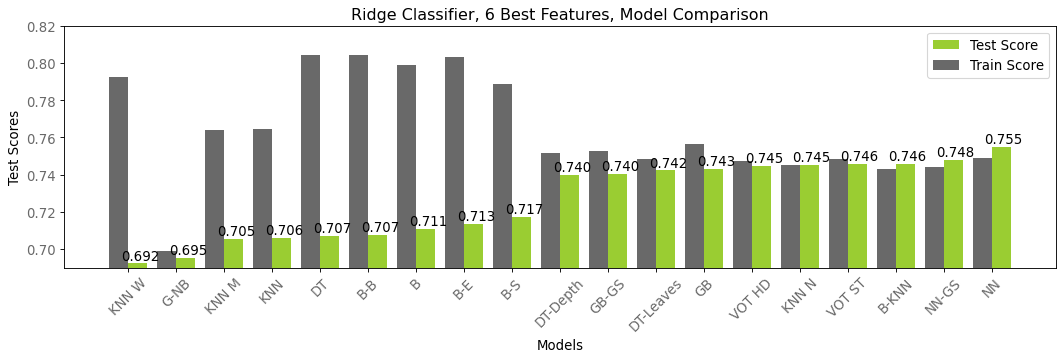

In [147]:
accuracies = [modelDT.score(X_test, y_test), bagging_DT.score(X_test, y_test), bagging_DT_40.score(X_test, y_test), 
              bagging_DT_s.score(X_test, y_test), bagging_DT_b.score(X_test, y_test),modelDT_leafs13.score(X_test, y_test),
             modelDT_maxdepth5.score(X_test, y_test),modelKNNW.score(X_test, y_test),
             modelKNNM.score(X_test, y_test),modelKNN100.score(X_test, y_test),
             modelKNN.score(X_test, y_test),modelNB.score(X_test, y_test),
              vot_hard.score(X_test, y_test),vot_soft.score(X_test, y_test),
             modelGB.score(X_test, y_test),modelNN.score(X_test, y_test),clf.score(X_test, y_test),
             clf_gb.score(X_test, y_test), bagging_KNN100.score(X_test, y_test)]
train_accuracies = [modelDT.score(X_train, y_train), bagging_DT.score(X_train, y_train), bagging_DT_40.score(X_train, y_train), 
              bagging_DT_s.score(X_train, y_train), bagging_DT_b.score(X_train, y_train),modelDT_leafs13.score(X_train, y_train),
             modelDT_maxdepth5.score(X_train, y_train),modelKNNW.score(X_train, y_train),
             modelKNNM.score(X_train, y_train),modelKNN100.score(X_train, y_train),
             modelKNN.score(X_train, y_train),modelNB.score(X_train, y_train),
            vot_hard.score(X_train, y_train),vot_soft.score(X_train, y_train),
                   modelGB.score(X_train, y_train),modelNN.score(X_train, y_train),
                   clf.score(X_train, y_train), clf_gb.score(X_train, y_train), bagging_KNN100.score(X_train, y_train)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B','DT-Leaves','DT-Depth','KNN W','KNN M','KNN N','KNN','G-NB','VOT HD','VOT ST','GB','NN','NN-GS','GB-GS','B-KNN']
data_tuples = list(zip(models,accuracies,train_accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)

plt.figure(figsize=(16,4), dpi=80)
x_axis = np.arange(len(data[0]))
plt.bar(x_axis+0.2, data[1],0.4, color='yellowgreen')
plt.bar(x_axis-0.2, data[2],0.4, color='dimgray')
plt.xticks(x_axis, data[0])
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.69,0.82)
pyplot.xticks(rotation=45)
pyplot.xlabel('Models')
pyplot.ylabel('Test Scores')
pyplot.title('Ridge Classifier, 6 Best Features, Model Comparison')
plt.legend(['Test Score','Train Score'])
xlocs=[i for i in range(0,20)]
for i, v in enumerate(data[1]):
    plt.text(xlocs[i] - 0.15, v + 0.002, str("{:.3f}".format(v)))

plt.show()

-------------------------Naive Bayes-----------------------------
              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1240
           1       0.65      0.81      0.72      1138

    accuracy                           0.70      2378
   macro avg       0.71      0.70      0.69      2378
weighted avg       0.71      0.70      0.69      2378



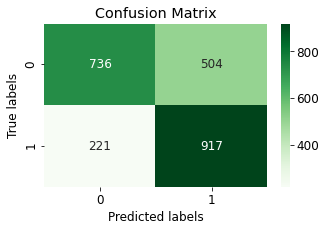

Train Score: 0.6988
Test Score: 0.6951
Cross Validation 5 Scores:  [0.72357724 0.70009033 0.69710669 0.68264014 0.67631103]
Mean Accuracy:  0.6959450872386963   ±  0.01639869323731512
-----------------------------------------------------------------
-------------------------KNN-----------------------------
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1240
           1       0.68      0.72      0.70      1138

    accuracy                           0.71      2378
   macro avg       0.71      0.71      0.71      2378
weighted avg       0.71      0.71      0.71      2378



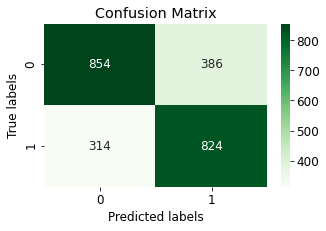

Train Score: 0.7643
Test Score: 0.7056
Cross Validation 5 Scores:  [0.71093044 0.68473351 0.70886076 0.7079566  0.70705244]
Mean Accuracy:  0.7039067515449116   ±  0.00967247753411409
-----------------------------------------------------------------
-------------------------KNN Neighbours-----------------------------
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1240
           1       0.73      0.73      0.73      1138

    accuracy                           0.75      2378
   macro avg       0.74      0.74      0.74      2378
weighted avg       0.75      0.75      0.75      2378



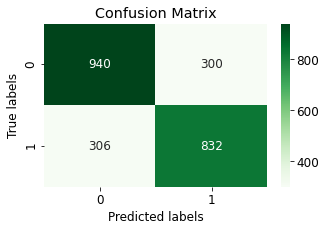

Train Score: 0.7449
Test Score: 0.7452
Cross Validation 5 Scores:  [0.75158085 0.73441734 0.75045208 0.73688969 0.73146474]
Mean Accuracy:  0.7409609406522033   ±  0.008395662673431234
-----------------------------------------------------------------
-------------------------KNN Metric-----------------------------
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1240
           1       0.68      0.72      0.70      1138

    accuracy                           0.71      2378
   macro avg       0.71      0.71      0.71      2378
weighted avg       0.71      0.71      0.71      2378



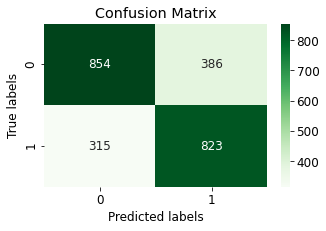

Train Score: 0.7641
Test Score: 0.7052
Cross Validation 5 Scores:  [0.7100271  0.68563686 0.70705244 0.70705244 0.70705244]
Mean Accuracy:  0.7033642560657072   ±  0.008938258469490012
-----------------------------------------------------------------
-------------------------KNN Weight-----------------------------
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1240
           1       0.67      0.70      0.68      1138

    accuracy                           0.69      2378
   macro avg       0.69      0.69      0.69      2378
weighted avg       0.69      0.69      0.69      2378



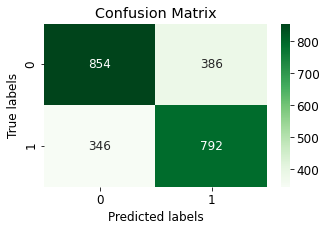

Train Score: 0.7923
Test Score: 0.6922
Cross Validation 5 Scores:  [0.70641373 0.66576332 0.69349005 0.69710669 0.70162749]
Mean Accuracy:  0.6928802573137245   ±  0.01423538949421573
-----------------------------------------------------------------
-------------------------Decision Tree-----------------------------
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1240
           1       0.71      0.66      0.68      1138

    accuracy                           0.71      2378
   macro avg       0.71      0.71      0.71      2378
weighted avg       0.71      0.71      0.71      2378



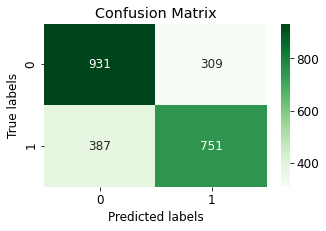

Train Score: 0.8044
Test Score: 0.7069
Cross Validation 5 Scores:  [0.70731707 0.68112014 0.70705244 0.70433996 0.71880651]
Mean Accuracy:  0.7037272265429103   ±  0.01235139217559897
-----------------------------------------------------------------
-------------------------DT Entropy-----------------------------
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1240
           1       0.71      0.65      0.68      1138

    accuracy                           0.71      2378
   macro avg       0.71      0.71      0.71      2378
weighted avg       0.71      0.71      0.71      2378



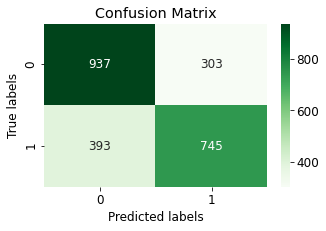

Train Score: 0.8044
Test Score: 0.7073
Cross Validation 5 Scores:  [0.70460705 0.68202349 0.70524412 0.70072333 0.71971067]
Mean Accuracy:  0.7024617304642004   ±  0.01208812488225885
-----------------------------------------------------------------
-------------------------DT Max depth-----------------------------
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1240
           1       0.73      0.73      0.73      1138

    accuracy                           0.74      2378
   macro avg       0.74      0.74      0.74      2378
weighted avg       0.74      0.74      0.74      2378



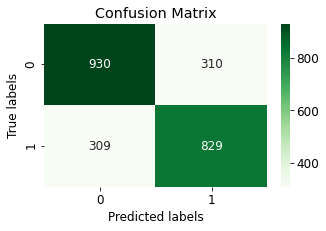

Train Score: 0.7518
Test Score: 0.7397
Cross Validation 5 Scores:  [0.75248419 0.74345077 0.75045208 0.72603978 0.73417722]
Mean Accuracy:  0.7413208074214557   ±  0.009970743441974149
-----------------------------------------------------------------
-------------------------DT Max leaf nodes-----------------------------
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1240
           1       0.73      0.72      0.73      1138

    accuracy                           0.74      2378
   macro avg       0.74      0.74      0.74      2378
weighted avg       0.74      0.74      0.74      2378



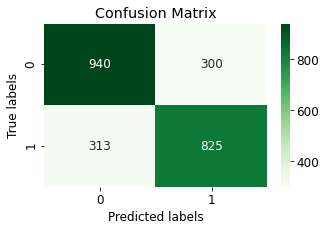

Train Score: 0.7486
Test Score: 0.7422
Cross Validation 5 Scores:  [0.76151762 0.74525745 0.75135624 0.74050633 0.73056058]
Mean Accuracy:  0.7458396428448915   ±  0.010377520218240196
-----------------------------------------------------------------
-------------------------Bagging DT Report-----------------------------
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1240
           1       0.70      0.68      0.69      1138

    accuracy                           0.71      2378
   macro avg       0.71      0.71      0.71      2378
weighted avg       0.71      0.71      0.71      2378



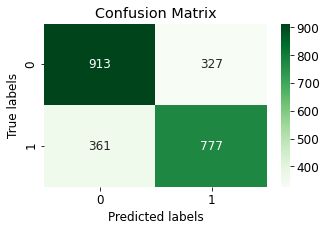

Train Score: 0.7992
Test Score: 0.7107
Cross Validation 5 Scores:  [0.70731707 0.68383017 0.7034358  0.70614828 0.71971067]
Mean Accuracy:  0.7040884001365632   ±  0.01157190073365149
-----------------------------------------------------------------
-------------------------Bagging DT Estimators-----------------------------
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1240
           1       0.70      0.70      0.70      1138

    accuracy                           0.71      2378
   macro avg       0.71      0.71      0.71      2378
weighted avg       0.71      0.71      0.71      2378



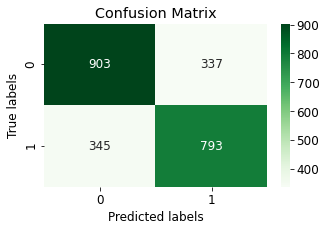

Train Score: 0.8033
Test Score: 0.7132
Cross Validation 5 Scores:  [0.71364047 0.69015357 0.71790235 0.70433996 0.71880651]
Mean Accuracy:  0.7089685725067015   ±  0.010713098868724341
-----------------------------------------------------------------
-------------------------Bagging DT Samples-----------------------------
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1240
           1       0.71      0.69      0.70      1138

    accuracy                           0.72      2378
   macro avg       0.72      0.72      0.72      2378
weighted avg       0.72      0.72      0.72      2378



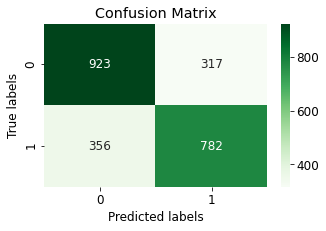

Train Score: 0.7885
Test Score: 0.7170
Cross Validation 5 Scores:  [0.70912376 0.70189702 0.71338156 0.69349005 0.73869801]
Mean Accuracy:  0.7113180794255201   ±  0.015266489351530063
-----------------------------------------------------------------
-------------------------Bagging Bootstrap False-----------------------------
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1240
           1       0.71      0.66      0.68      1138

    accuracy                           0.71      2378
   macro avg       0.71      0.71      0.71      2378
weighted avg       0.71      0.71      0.71      2378



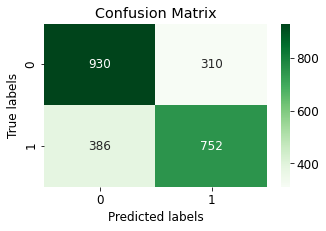

Train Score: 0.8044
Test Score: 0.7073
Cross Validation 5 Scores:  [0.70641373 0.68112014 0.70705244 0.70253165 0.71880651]
Mean Accuracy:  0.703184894416756   ±  0.012302016874574903
-----------------------------------------------------------------
-------------------------Voting Hard-----------------------------
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1240
           1       0.73      0.75      0.74      1138

    accuracy                           0.74      2378
   macro avg       0.74      0.74      0.74      2378
weighted avg       0.75      0.74      0.74      2378



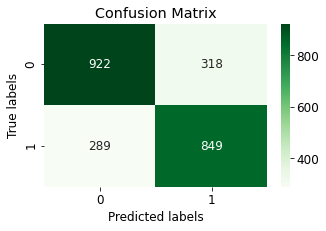

Train Score: 0.7471
Test Score: 0.7447
Cross Validation 5 Scores:  [0.76242096 0.7398374  0.76039783 0.73598553 0.73417722]
Mean Accuracy:  0.7465637869157473   ±  0.012275190565482264
-----------------------------------------------------------------
-------------------------Voting Soft-----------------------------
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1240
           1       0.73      0.75      0.74      1138

    accuracy                           0.75      2378
   macro avg       0.75      0.75      0.75      2378
weighted avg       0.75      0.75      0.75      2378



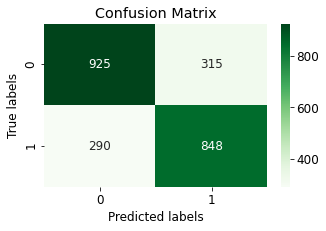

Train Score: 0.7486
Test Score: 0.7456
Cross Validation 5 Scores:  [0.75971093 0.73893406 0.76401447 0.73869801 0.73688969]
Mean Accuracy:  0.7476494312863563   ±  0.011705996855785763
-----------------------------------------------------------------
-------------------------Gradient Boosting-----------------------------
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1240
           1       0.73      0.73      0.73      1138

    accuracy                           0.74      2378
   macro avg       0.74      0.74      0.74      2378
weighted avg       0.74      0.74      0.74      2378



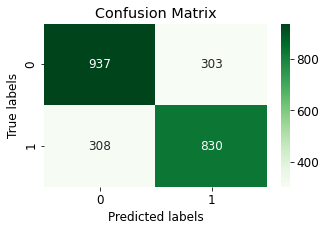

Train Score: 0.7567
Test Score: 0.7431
Cross Validation 5 Scores:  [0.74525745 0.74074074 0.76491863 0.73869801 0.73508137]
Mean Accuracy:  0.7449392408330352   ±  0.01051698592163556
-----------------------------------------------------------------
-------------------------Gradient Boosting Grid Search-----------------------------
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1240
           1       0.73      0.72      0.73      1138

    accuracy                           0.74      2378
   macro avg       0.74      0.74      0.74      2378
weighted avg       0.74      0.74      0.74      2378



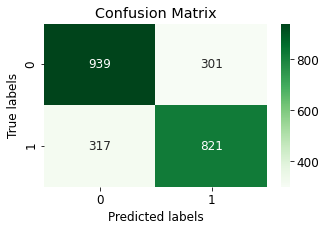

Train Score: 0.7527
Test Score: 0.7401
Cross Validation 5 Scores:  [0.75338753 0.73712737 0.74593128 0.73327306 0.73417722]
Mean Accuracy:  0.7407792920605517   ±  0.007730178587886283
-----------------------------------------------------------------
-------------------------Neural Networks-----------------------------
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1240
           1       0.75      0.73      0.74      1138

    accuracy                           0.75      2378
   macro avg       0.75      0.75      0.75      2378
weighted avg       0.75      0.75      0.75      2378



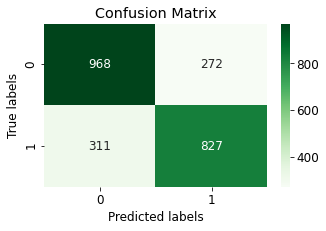

Train Score: 0.7489
Test Score: 0.7548
Cross Validation 5 Scores:  [0.74977416 0.733514   0.75678119 0.73779385 0.74050633]
Mean Accuracy:  0.7436739081073752   ±  0.008448033770079764
-----------------------------------------------------------------
-------------------------Neural Network Grid Search-----------------------------
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1240
           1       0.76      0.69      0.72      1138

    accuracy                           0.75      2378
   macro avg       0.75      0.75      0.75      2378
weighted avg       0.75      0.75      0.75      2378



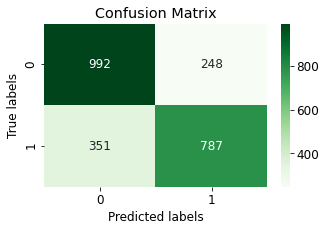

Train Score: 0.7439
Test Score: 0.7481
Cross Validation 5 Scores:  [0.74977416 0.73712737 0.75678119 0.73960217 0.74412297]
Mean Accuracy:  0.7454815729591896   ±  0.007103712332349089
-----------------------------------------------------------------
-------------------------Bagging KNN Neighbours-----------------------------
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1240
           1       0.74      0.72      0.73      1138

    accuracy                           0.75      2378
   macro avg       0.75      0.74      0.74      2378
weighted avg       0.75      0.75      0.75      2378



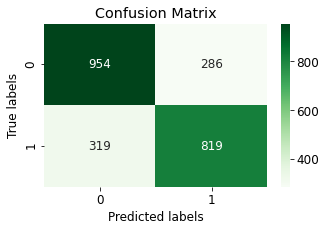

Train Score: 0.7428
Test Score: 0.7456
Cross Validation 5 Scores:  [0.75429088 0.73712737 0.75135624 0.73508137 0.7323689 ]
Mean Accuracy:  0.7420449514923118   ±  0.008977335646975284
-----------------------------------------------------------------


In [156]:

for (x,z,y) in [(modelNB_pred,modelNB,'Naive Bayes'),(modelKNN_pred,modelKNN,'KNN'),
                (modelKNN100_pred,modelKNN100,'KNN Neighbours'),(modelKNNM_pred,modelKNNM,'KNN Metric'),(modelKNNW_pred,modelKNNW,'KNN Weight'),
                (modelDT_pred,modelDT,'Decision Tree'),(modelDT_entropy_pred,modelDT_entropy,'DT Entropy'),(modelDT_maxdepth_pred,modelDT_maxdepth5,'DT Max depth'),
                (modelDT_leafs13_pred,modelDT_leafs13,'DT Max leaf nodes'),(y_pred_bagging,bagging_DT,'Bagging DT Report'),
                (bagging_DT_40_pred,bagging_DT_40,'Bagging DT Estimators'),(bagging_DT_s_pred,bagging_DT_s,'Bagging DT Samples'),
                (bagging_DT_b_pred,bagging_DT_b,'Bagging Bootstrap False'),(hard_pred,vot_hard,'Voting Hard'),
                (soft_pred,vot_soft,'Voting Soft'),(modelGB_pred,modelGB,'Gradient Boosting'),(clf_gb_pred,clf_gb,'Gradient Boosting Grid Search'),
               (modelNN_pred,modelNN,'Neural Networks'),(clf_pred,clf,'Neural Network Grid Search'),
               (bagging_KNN100_pred,bagging_KNN100,'Bagging KNN Neighbours')]:
    print('-------------------------'+y+'-----------------------------')
    print_classification(y_test,x)
    print('Train Score: '+str("{:.4f}".format(z.score(X_train, y_train))))
    print('Test Score: '+str("{:.4f}".format(z.score(X_test, y_test))))
    scores = cross_val_score(z, X_train, y_train, cv=5)
    print('Cross Validation 5 Scores: ', scores)
    print('Mean Accuracy: ',scores.mean(),'  ± ',scores.std())

    print('-----------------------------------------------------------------')

___Code to Save predictions as CSV___

In [157]:
# labels_final = MODEL.predict(espionage_test)
# prediction = pd.DataFrame({'ID_ORIGINAL': espionage_test.index,
#                     'Spy': labels_final.astype(int)})

# prediction = prediction.set_index("ID_ORIGINAL")
# prediction
# prediction.to_csv('Group5_versionX.csv')

In [164]:
labels_final = modelNN.predict(espionage_test)
prediction = pd.DataFrame({'ID_ORIGINAL': espionage_test.index,
                    'Spy': labels_final.astype(int)})

prediction = prediction.set_index("ID_ORIGINAL")
prediction

,Spy
ID_ORIGINAL,
460139,0
460648,0
460835,0
461613,0
461721,0
...,...
473596,0
477769,1
475292,1


<h2>Final Model</h2>
<b>Neural Network:</b>
<ul>
  <li>Solver: lbfgs</li>
  <li>Initial Learning Rate: 0.01</li>
  <li>Kaggle Score: 0.7005</li>
</ul>

-------------------------NEURAL NETWORK----------------------------
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1240
           1       0.75      0.73      0.74      1138

    accuracy                           0.75      2378
   macro avg       0.75      0.75      0.75      2378
weighted avg       0.75      0.75      0.75      2378



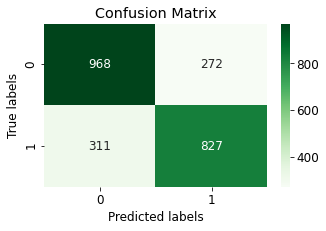

Train Score: 0.7489
Test Score: 0.7548
Cross Validation 5 Scores:  [0.75429088 0.73803071 0.75587703 0.73508137 0.73869801]
Mean Accuracy:  0.7443956018824806   ±  0.008825745603646276
-----------------------------------------------------------------


In [160]:
print('-------------------------NEURAL NETWORK--------------------------')
print_classification(y_test,modelNN_pred)
print('Train Score: '+str("{:.4f}".format(modelNN.score(X_train, y_train))))
print('Test Score: '+str("{:.4f}".format(modelNN.score(X_test, y_test))))
scores = cross_val_score(modelNN, X_train, y_train, cv=5)
print('Cross Validation 5 Scores: ', scores)
print('Mean Accuracy: ',scores.mean(),'  ± ',scores.std())

print('-----------------------------------------------------------------')